<img align="top" alt="GIF" height="500px" width="1000px" src="https://media.giphy.com/media/L1R1tvI9svkIWwpVYr/giphy.gif" />

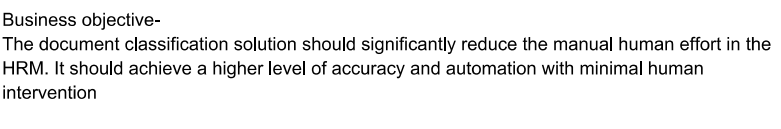

# Import Libraries

#### start

In [ ]:
!pip install textract

restart runtime

In [ ]:
!pip install regex

In [ ]:
!sudo apt-get install antiword

Reading package lists... Done
Building dependency tree       
Reading state information... Done
antiword is already the newest version (0.37-16).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [ ]:
import re

In [ ]:
import zipfile

In [ ]:
import os

In [ ]:
import textract

In [ ]:
import pandas as pd

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk import word_tokenize

### Importing and extracting Datas from zipfile

In [ ]:
zip_filepath="/content/Resumes.zip"

In [ ]:
with zipfile.ZipFile(zip_filepath,'r') as zip_read:
    zip_read.extractall("/content/")
    zip_extract=zip_read.namelist()

In [ ]:
zip_extract

['Resumes/React Developer_Haripriya.docx',
 'Resumes/React Developer_Naveen sadhu.docx',
 'Resumes/Reactjs Developer_MD Khizaruddin Rauf _Musquare Technologies.docx',
 'Resumes/Internship_Susovan Bag_Musquare Technologies.docx',
 'Resumes/Internship_Ravali_Musquare Technologies (1).docx',
 'Resumes/React Developer_Pragnya.docx',
 'Resumes/Reactjs Developer_M Lokesh.docx',
 'Resumes/Reactjs Developer_Prabakaran_Musquare Technologies.pdf',
 'Resumes/Reactjs Developer_Pranish Sonone_Musquare Technologies.docx',
 'Resumes/React Developer_Sarala Madasu-converted.docx',
 'Resumes/React Developer_Kamalakar Reddy.docx',
 'Resumes/React JS Developer_Venkatalakshmi (1)-converted.docx',
 'Resumes/React JS Developer_AnjaniPriyadarshini.doc',
 'Resumes/React Developer_Vinay Reddy.doc',
 'Resumes/Reactjs Developer_Ranga Gaganam_Musquare Technologies.docx',
 'Resumes/Reactjs Developer_M Lokesh Babu_Musquare Technologies.docx',
 'Resumes/React Developer_Thirupathiamma.docx',
 'Resumes/React JS Develop

In [ ]:
len(zip_extract)

79

In [ ]:
dir='/content/rs'

### Extracting each files using user defined funtion readresume and ceating a dataframe called df

In [ ]:
def readresume(directory):
    file_path = []
    category = []
    file_content = []
    file_name = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            file_path.append(os.path.join(root, file))
            folder_name = os.path.basename(root)

            if folder_name=="Resumes":
               folder_name="React_JS"

            elif re.search(r'\bresumes\b',folder_name,flags=re.IGNORECASE):
               folder_name = folder_name.replace("resumes", "").strip()

            category.append(folder_name)
            file_name.append(file)

            # Extract the file content using textract
            content = textract.process(os.path.join(root, file)).decode('utf-8')
            file_content.append(content)

    # Create a DataFrame
    df = pd.DataFrame({
        'File': file_name,
        'Content': file_content,
        'JobPost': category
    })

    return df


In [ ]:
Data=readresume("/content/Resumes")

In [ ]:
Data

,File,Content,JobPost
0,React JS Developer_KotaniDurgaprasad[3_1] (1)-...,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React_JS
1,React Dev_Krishna Kanth_Musquare Technologies....,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React_JS
2,React Developer_Sarala Madasu-converted.docx,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React_JS
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React_JS
4,React Dev_Krishna Kanth.docx,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React_JS
...,...,...,...
74,Srikanth-Hexaware.docx,Srikanth (WORKDAY hCM Consultant)\t ...,workday
75,SSKumar_Hexaware.docx,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday
76,Jyotiverma_Heaware.docx,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,workday
77,ChinnaSubbarayuduM_Hexaware.docx,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday


In [ ]:
import matplotlib.pyplot as plt

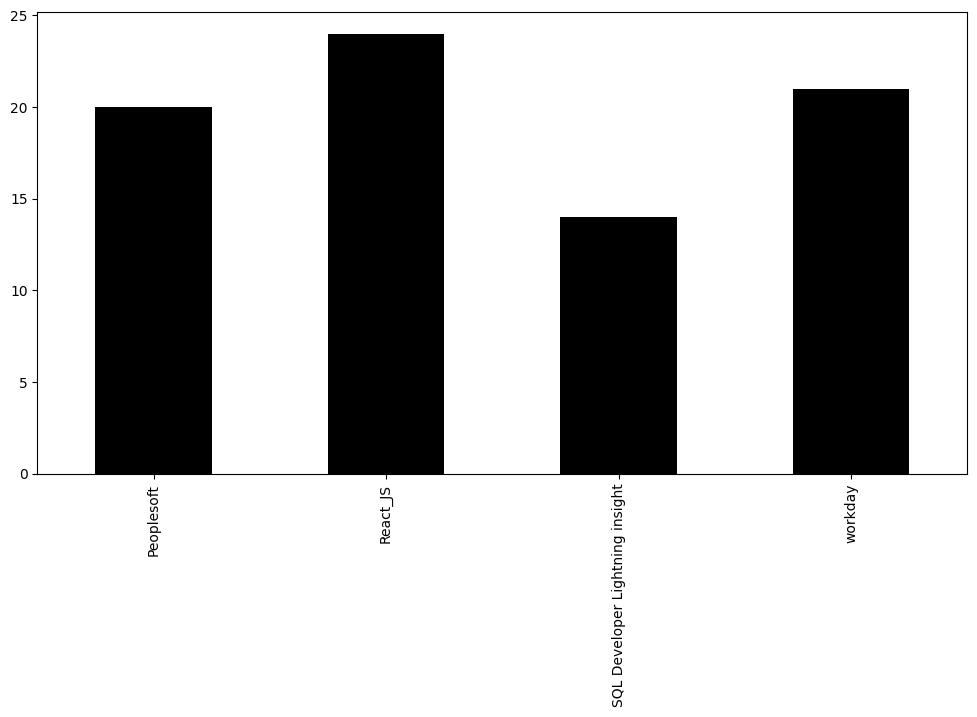

In [ ]:
Data['JobPost'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6),color='k')
plt.show()

Finally extracted files data and its category as its folder name but see the Reactjs people category as Resumes so we will remove all resume word from Category and will add only folder name as category and Since react files was outside of subfolders,not in any folder so ..Vivek K...let us change to ReactJs

<img align="top" alt="GIF" height="500px" width="500px" src="https://media0.giphy.com/media/CrFLL3CnRpw5ddlBMm/giphy.gif?cid=ecf05e47imwhm4yhyq1at2tpntundhvh0dxjoxk22yezlfe8&ep=v1_gifs_search&rid=giphy.gif&ct=g" />

In [ ]:
Data.duplicated().sum()

0

In [ ]:
CopyData=Data.copy()

### EDA

##### Data Cleaning

Let us clean data by removing unwanted characters and can extract required data from cleaned data set.Ok let's Start then....

##### Tokenisation of Data

If text contains multiple sentences or paragraphs, it's better to use a tokenizer that can handle those cases appropriately.So we will use Tweet tokenizer.


In the context of text processing, leading refers to the characters or whitespace at the beginning of a string, while trailing refers to the characters or whitespace at the end of a string.So we will remove these leading and trailing characters and we will remove empty strings.

In [ ]:
from nltk import word_tokenize

In [ ]:
def Cleaned(text):
    tokens = word_tokenize(text)
    details = [Text.strip() for Text in tokens]
    details = [Text for Text in details if Text]
    details = ' '.join(details)
    return details

In [ ]:
for index, row in CopyData.iterrows():
    content = row['Content']
    processed_text = Cleaned(content)
    CopyData.at[index, 'ProcessedText'] = processed_text

In [ ]:
CopyData

,File,Content,JobPost,ProcessedText
0,React JS Developer_KotaniDurgaprasad[3_1] (1)-...,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React_JS,Kotani Durga Prasad Objective : Aspirant for a...
1,React Dev_Krishna Kanth_Musquare Technologies....,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React_JS,Ui-Developer/ React JS Developer NAME : KRISHN...
2,React Developer_Sarala Madasu-converted.docx,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React_JS,"SARALA MADASU SARALA MADASU  204 , Sri geethi..."
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...
4,React Dev_Krishna Kanth.docx,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React_JS,Ui-Developer/ React JS Developer NAME : KRISHN...
...,...,...,...,...
74,Srikanth-Hexaware.docx,Srikanth (WORKDAY hCM Consultant)\t ...,workday,Srikanth ( WORKDAY hCM Consultant ) Seeking su...
75,SSKumar_Hexaware.docx,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday,WORKDAY | HCM | FCM Name : Kumar S.S Role : Wo...
76,Jyotiverma_Heaware.docx,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,workday,JYOTI VERMA PROFESSIONAL SUMMARY PROFESSIONAL ...
77,ChinnaSubbarayuduM_Hexaware.docx,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday,Chinna Subbarayudu M DOB : 06th March 1994 Nat...


Ohkkkkkkk Now letus go for tweet tokenizer for some better process can use the tokenisation used above also but we will use different now.

In [ ]:
from nltk.tokenize import TweetTokenizer

In [ ]:
def tknzr(details):
  tknzr = TweetTokenizer(strip_handles=True)
  tokens = tknzr.tokenize(details)
  Text = ' '.join(tokens)
  return Text

In [ ]:
for index, row in CopyData.iterrows():
    content = row['ProcessedText']
    processed_text = tknzr(content)
    CopyData.at[index, 'ProcessedText'] = processed_text

In [ ]:
CopyData

,File,Content,JobPost,ProcessedText
0,React JS Developer_KotaniDurgaprasad[3_1] (1)-...,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React_JS,Kotani Durga Prasad Objective : Aspirant for a...
1,React Dev_Krishna Kanth_Musquare Technologies....,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React_JS,Ui-Developer / React JS Developer NAME : KRISH...
2,React Developer_Sarala Madasu-converted.docx,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React_JS,"SARALA MADASU SARALA MADASU  204 , Sri geethi..."
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...
4,React Dev_Krishna Kanth.docx,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React_JS,Ui-Developer / React JS Developer NAME : KRISH...
...,...,...,...,...
74,Srikanth-Hexaware.docx,Srikanth (WORKDAY hCM Consultant)\t ...,workday,Srikanth ( WORKDAY hCM Consultant ) Seeking su...
75,SSKumar_Hexaware.docx,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...
76,Jyotiverma_Heaware.docx,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,workday,JYOTI VERMA PROFESSIONAL SUMMARY PROFESSIONAL ...
77,ChinnaSubbarayuduM_Hexaware.docx,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday,Chinna Subbarayudu M DOB : 06th March 1994 Nat...


###### Extarct Url from Dtails and add to DataFrame for later use if they add their kaggle Git link it will be usefull later to analyse it.

In [ ]:
def extract_urls(text):
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    urls = re.findall(url_pattern, text)
    return urls

In [ ]:
for index, row in CopyData.iterrows():
    content = row['Content']
    processed_text = extract_urls(content)  # Extract URLs from the text
    processed_text_str = ', '.join(processed_text)  # Convert the list to a string
    CopyData.at[index, 'Url'] = processed_text_str

In [ ]:
CopyData

,File,Content,JobPost,ProcessedText,Url
0,React JS Developer_KotaniDurgaprasad[3_1] (1)-...,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React_JS,Kotani Durga Prasad Objective : Aspirant for a...,
1,React Dev_Krishna Kanth_Musquare Technologies....,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React_JS,Ui-Developer / React JS Developer NAME : KRISH...,
2,React Developer_Sarala Madasu-converted.docx,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React_JS,"SARALA MADASU SARALA MADASU  204 , Sri geethi...",
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,
4,React Dev_Krishna Kanth.docx,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React_JS,Ui-Developer / React JS Developer NAME : KRISH...,
...,...,...,...,...,...
74,Srikanth-Hexaware.docx,Srikanth (WORKDAY hCM Consultant)\t ...,workday,Srikanth ( WORKDAY hCM Consultant ) Seeking su...,
75,SSKumar_Hexaware.docx,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...,
76,Jyotiverma_Heaware.docx,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,workday,JYOTI VERMA PROFESSIONAL SUMMARY PROFESSIONAL ...,
77,ChinnaSubbarayuduM_Hexaware.docx,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday,Chinna Subbarayudu M DOB : 06th March 1994 Nat...,


### find phone numbers and remove it

In [ ]:
def findphone(text):
  phone_pattern = r'(\+\d{1,3}\s?\d{10})|(\b\d{10}\b)'
  phone_numbers = re.findall(phone_pattern, text)
  phone_numbers = [match[0] or match[1] for match in re.findall(phone_pattern, text)]
  text_without_phone=re.sub(phone_pattern, '', text)
  return phone_numbers,text_without_phone

In [ ]:
for index, row in CopyData.iterrows():
    data = row['ProcessedText']
    phone_numbers, text_without_phone = findphone(data)
    CopyData.at[index, 'phone'] = ', '.join(phone_numbers) if phone_numbers else ''
    CopyData.at[index, 'ProcessedText'] = text_without_phone

In [ ]:
CopyData

,File,Content,JobPost,ProcessedText,Url,phone
0,React JS Developer_KotaniDurgaprasad[3_1] (1)-...,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React_JS,Kotani Durga Prasad Objective : Aspirant for a...,,
1,React Dev_Krishna Kanth_Musquare Technologies....,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React_JS,Ui-Developer / React JS Developer NAME : KRISH...,,
2,React Developer_Sarala Madasu-converted.docx,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React_JS,"SARALA MADASU SARALA MADASU  204 , Sri geethi...",,
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950
4,React Dev_Krishna Kanth.docx,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React_JS,Ui-Developer / React JS Developer NAME : KRISH...,,
...,...,...,...,...,...,...
74,Srikanth-Hexaware.docx,Srikanth (WORKDAY hCM Consultant)\t ...,workday,Srikanth ( WORKDAY hCM Consultant ) Seeking su...,,
75,SSKumar_Hexaware.docx,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...,,
76,Jyotiverma_Heaware.docx,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,workday,JYOTI VERMA PROFESSIONAL SUMMARY PROFESSIONAL ...,,
77,ChinnaSubbarayuduM_Hexaware.docx,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday,Chinna Subbarayudu M DOB : 06th March 1994 Nat...,,


#### Removecertain patterns "@[\w]*" from details

In [ ]:
import string

In [ ]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [ ]:
import numpy as np

In [ ]:
CopyData['ProcessedText'] = np.vectorize(remove_pattern)(CopyData['ProcessedText'], "@[\w]*")
CopyData.head(10)

,File,Content,JobPost,ProcessedText,Url,phone
0,React JS Developer_KotaniDurgaprasad[3_1] (1)-...,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React_JS,Kotani Durga Prasad Objective : Aspirant for a...,,
1,React Dev_Krishna Kanth_Musquare Technologies....,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React_JS,Ui-Developer / React JS Developer NAME : KRISH...,,
2,React Developer_Sarala Madasu-converted.docx,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React_JS,"SARALA MADASU SARALA MADASU  204 , Sri geethi...",,
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950
4,React Dev_Krishna Kanth.docx,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React_JS,Ui-Developer / React JS Developer NAME : KRISH...,,
5,Reactjs Developer_Pranish Sonone_Musquare Tech...,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React_JS,Pranish Sonone Career summary : Experience of ...,,
6,React Developer_Vinay Reddy.doc,\nMaryala Vinay Reddy\n\nProfessional Summary:...,React_JS,Maryala Vinay Reddy Professional Summary : • H...,,
7,React Developer_Thirupathiamma.docx,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React_JS,Thirupathamma Balla SUMMARY : 2.8 year of IT e...,,
8,Internship_Susovan Bag_Musquare Technologies.docx,SUSOVAN BAG \n\nSeeking a challenging po...,React_JS,SUSOVAN BAG Seeking a challenging position in ...,,
9,React JS Developer_Venkatalakshmi (1)-converte...,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React_JS,Venkatalakshmi Pedireddy Software Developer Ex...,https://batvidcoronaawareness.000webhostapp.com,


### Remove URL and words containing "http"

In [ ]:
CopyData['ProcessedText'] = CopyData['ProcessedText'].astype(str)
CopyData['ProcessedText'] = CopyData['ProcessedText'].apply(lambda x: re.sub(r'http[s]?://\S+', '', x))

In [ ]:
clean=[]

In [ ]:
for index, row in CopyData.iterrows():
    no_links = [word for word in row.ProcessedText.split() if 'http' not in word]
    clean.append(' '.join(no_links))

In [ ]:
CopyData['ProcessedText'] = clean

In [ ]:
CopyData

,File,Content,JobPost,ProcessedText,Url,phone
0,React JS Developer_KotaniDurgaprasad[3_1] (1)-...,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React_JS,Kotani Durga Prasad Objective : Aspirant for a...,,
1,React Dev_Krishna Kanth_Musquare Technologies....,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React_JS,Ui-Developer / React JS Developer NAME : KRISH...,,
2,React Developer_Sarala Madasu-converted.docx,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React_JS,"SARALA MADASU SARALA MADASU  204 , Sri geethi...",,
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950
4,React Dev_Krishna Kanth.docx,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React_JS,Ui-Developer / React JS Developer NAME : KRISH...,,
...,...,...,...,...,...,...
74,Srikanth-Hexaware.docx,Srikanth (WORKDAY hCM Consultant)\t ...,workday,Srikanth ( WORKDAY hCM Consultant ) Seeking su...,,
75,SSKumar_Hexaware.docx,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...,,
76,Jyotiverma_Heaware.docx,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,workday,JYOTI VERMA PROFESSIONAL SUMMARY PROFESSIONAL ...,,
77,ChinnaSubbarayuduM_Hexaware.docx,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday,Chinna Subbarayudu M DOB : 06th March 1994 Nat...,,


### Removing empty resume

In [ ]:
CopyData=CopyData[CopyData['ProcessedText']!='']

In [ ]:
CopyData

,File,Content,JobPost,ProcessedText,Url,phone
0,React JS Developer_KotaniDurgaprasad[3_1] (1)-...,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React_JS,Kotani Durga Prasad Objective : Aspirant for a...,,
1,React Dev_Krishna Kanth_Musquare Technologies....,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React_JS,Ui-Developer / React JS Developer NAME : KRISH...,,
2,React Developer_Sarala Madasu-converted.docx,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React_JS,"SARALA MADASU SARALA MADASU  204 , Sri geethi...",,
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950
4,React Dev_Krishna Kanth.docx,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React_JS,Ui-Developer / React JS Developer NAME : KRISH...,,
...,...,...,...,...,...,...
74,Srikanth-Hexaware.docx,Srikanth (WORKDAY hCM Consultant)\t ...,workday,Srikanth ( WORKDAY hCM Consultant ) Seeking su...,,
75,SSKumar_Hexaware.docx,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...,,
76,Jyotiverma_Heaware.docx,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,workday,JYOTI VERMA PROFESSIONAL SUMMARY PROFESSIONAL ...,,
77,ChinnaSubbarayuduM_Hexaware.docx,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday,Chinna Subbarayudu M DOB : 06th March 1994 Nat...,,


### Remove Duplicated Resumes

In [ ]:
CopyData.drop_duplicates(subset=['ProcessedText'], keep=False)
CopyData

,File,Content,JobPost,ProcessedText,Url,phone
0,React JS Developer_KotaniDurgaprasad[3_1] (1)-...,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React_JS,Kotani Durga Prasad Objective : Aspirant for a...,,
1,React Dev_Krishna Kanth_Musquare Technologies....,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React_JS,Ui-Developer / React JS Developer NAME : KRISH...,,
2,React Developer_Sarala Madasu-converted.docx,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React_JS,"SARALA MADASU SARALA MADASU  204 , Sri geethi...",,
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950
4,React Dev_Krishna Kanth.docx,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React_JS,Ui-Developer / React JS Developer NAME : KRISH...,,
...,...,...,...,...,...,...
74,Srikanth-Hexaware.docx,Srikanth (WORKDAY hCM Consultant)\t ...,workday,Srikanth ( WORKDAY hCM Consultant ) Seeking su...,,
75,SSKumar_Hexaware.docx,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...,,
76,Jyotiverma_Heaware.docx,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,workday,JYOTI VERMA PROFESSIONAL SUMMARY PROFESSIONAL ...,,
77,ChinnaSubbarayuduM_Hexaware.docx,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday,Chinna Subbarayudu M DOB : 06th March 1994 Nat...,,


### Cleaning Data to pure form (Text strip)

In [ ]:
def cleandata(text):
    '''Make text lowercase, remove text in square brackets, remove links, remove punctuation,
    remove words containing numbers, handle contractions, and correct misspellings.'''

    # Make text lowercase
    text = text.lower()

    # Remove text in square brackets
    text = re.sub('\[.*?\]', '', text)

    # Remove special characters
    text = re.sub('⇨|:|•|!', '', text)

    # Remove links
    text = re.sub('https?://\S+|www\.\S+', '', text)

    # Remove HTML tags
    text = re.sub('<.*?>+', '', text)

    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # Remove newlines
    text = re.sub('\n', '', text)

    # Remove tab
    text = text.replace('\t', ' ')

    # Remove extra white space
    text=re.sub('\s+', ' ', text)

    # Remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)

    #Remove numeric and alpha numeric texts

    text = re.sub( r'[^A-Za-z]', ' ', text)

    return text

In [ ]:
for index, row in CopyData.iterrows():
    data=row['ProcessedText']
    text=cleandata(data)
    CopyData.at[index, 'CleanedText'] = text

In [ ]:
CopyData

,File,Content,JobPost,ProcessedText,Url,phone,CleanedText
0,React JS Developer_KotaniDurgaprasad[3_1] (1)-...,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React_JS,Kotani Durga Prasad Objective : Aspirant for a...,,,kotani durga prasad objective aspirant for a p...
1,React Dev_Krishna Kanth_Musquare Technologies....,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React_JS,Ui-Developer / React JS Developer NAME : KRISH...,,,uideveloper react js developer name krishna pr...
2,React Developer_Sarala Madasu-converted.docx,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React_JS,"SARALA MADASU SARALA MADASU  204 , Sri geethi...",,,sarala madasu sarala madasu sri geethika pr...
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950,haripriya battina experience as ui developer i...
4,React Dev_Krishna Kanth.docx,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React_JS,Ui-Developer / React JS Developer NAME : KRISH...,,,uideveloper react js developer name krishna pr...
...,...,...,...,...,...,...,...
74,Srikanth-Hexaware.docx,Srikanth (WORKDAY hCM Consultant)\t ...,workday,Srikanth ( WORKDAY hCM Consultant ) Seeking su...,,,srikanth workday hcm consultant seeking suitab...
75,SSKumar_Hexaware.docx,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...,,,workday hcm fcm name kumar s s role workday co...
76,Jyotiverma_Heaware.docx,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,workday,JYOTI VERMA PROFESSIONAL SUMMARY PROFESSIONAL ...,,,jyoti verma professional summary professional ...
77,ChinnaSubbarayuduM_Hexaware.docx,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday,Chinna Subbarayudu M DOB : 06th March 1994 Nat...,,,chinna subbarayudu m dob march nationality i...


### Removing Emojis and images if exist

In [ ]:
def remove_pictures_and_emojis(text):
    # Regular expression pattern to match pictures and emojis
    picture_emoji_pattern = r'[^\w\s,.!?]'
    text_without_pictures_emojis = re.sub(picture_emoji_pattern, '', text)  # Replaces pictures and emojis with an empty string
    return text_without_pictures_emojis

In [ ]:
for index, row in CopyData.iterrows():
    data=row['CleanedText']
    text=remove_pictures_and_emojis(data)
    CopyData.at[index, 'CleanedText'] = text

In [ ]:
CopyData

,File,Content,JobPost,ProcessedText,Url,phone,CleanedText
0,React JS Developer_KotaniDurgaprasad[3_1] (1)-...,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React_JS,Kotani Durga Prasad Objective : Aspirant for a...,,,kotani durga prasad objective aspirant for a p...
1,React Dev_Krishna Kanth_Musquare Technologies....,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React_JS,Ui-Developer / React JS Developer NAME : KRISH...,,,uideveloper react js developer name krishna pr...
2,React Developer_Sarala Madasu-converted.docx,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React_JS,"SARALA MADASU SARALA MADASU  204 , Sri geethi...",,,sarala madasu sarala madasu sri geethika pr...
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950,haripriya battina experience as ui developer i...
4,React Dev_Krishna Kanth.docx,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React_JS,Ui-Developer / React JS Developer NAME : KRISH...,,,uideveloper react js developer name krishna pr...
...,...,...,...,...,...,...,...
74,Srikanth-Hexaware.docx,Srikanth (WORKDAY hCM Consultant)\t ...,workday,Srikanth ( WORKDAY hCM Consultant ) Seeking su...,,,srikanth workday hcm consultant seeking suitab...
75,SSKumar_Hexaware.docx,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...,,,workday hcm fcm name kumar s s role workday co...
76,Jyotiverma_Heaware.docx,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,workday,JYOTI VERMA PROFESSIONAL SUMMARY PROFESSIONAL ...,,,jyoti verma professional summary professional ...
77,ChinnaSubbarayuduM_Hexaware.docx,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday,Chinna Subbarayudu M DOB : 06th March 1994 Nat...,,,chinna subbarayudu m dob march nationality i...


### Handle Contractions

Handle contractions: If your resume text contains contractions like "don't" or "can't," you can choose to either expand them ("do not," "cannot") or keep them as is, depending on your preference and the requirements of your analysis.

In [ ]:
#from textblob import TextBlob

In [ ]:
#def Contract(text):
    #corrected_text = TextBlob(text).correct()
    #return str(corrected_text)


In [ ]:
#for index, row in CopyData.iterrows():
   # data = row['CleanedText']
   # corrected_text = Contract(data)
   # CopyData.at[index, 'CleanedText'] = corrected_text

We will not try contractions because it is changing even persons name also so that part we will remove.

Correct common misspellings: Implementing a spell-checking mechanism can help identify and correct common misspellings in the resume text. This can improve the accuracy and quality of the cleaned text. But we will not do since it may change some name or other thing so by lemmitisation it will be solved .

Remove boilerplate text: In some cases, resumes may contain standardized or boilerplate text that appears across multiple resumes. You can identify and remove such text to focus more on the unique content of each resume

### Remove boilerplate text

In the context of resume classification, removing boilerplate text can be beneficial. Boilerplate text in resumes often includes standard sections such as contact information, education history, and job descriptions that are common across many resumes. These sections may not contribute significantly to the classification task since they don't contain unique information that distinguishes one resume from another.

By removing boilerplate text, you can focus on the content that is more specific and indicative of the candidate's skills, experience, and qualifications. This can help improve the accuracy and effectiveness of your resume classification model by reducing noise and irrelevant information.

In [ ]:
def remove_boilerplate(text):
    # Define patterns for common boilerplate sections
    boilerplate_patterns = [
        r'contact information:.*',
        r'adress:.*',
        r'mobile:*',
        r'hobbies:.*',
        r'email".*',
        r'Github:.*',
        r'Kaggle:.*'
    ]

    # Remove boilerplate sections from the text
    for pattern in boilerplate_patterns:
        text = re.sub(pattern, '', text, flags=re.IGNORECASE)

    # Remove extra whitespace and newlines
    text = re.sub('\s+', ' ', text).strip()

    return text

In [ ]:
for index, row in CopyData.iterrows():
    data = row['CleanedText']
    corrected_text = remove_boilerplate(data)
    CopyData.at[index, 'CleanedText'] = corrected_text

In [ ]:
 CopyData

,File,Content,JobPost,ProcessedText,Url,phone,CleanedText
0,React JS Developer_KotaniDurgaprasad[3_1] (1)-...,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React_JS,Kotani Durga Prasad Objective : Aspirant for a...,,,kotani durga prasad objective aspirant for a p...
1,React Dev_Krishna Kanth_Musquare Technologies....,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React_JS,Ui-Developer / React JS Developer NAME : KRISH...,,,uideveloper react js developer name krishna pr...
2,React Developer_Sarala Madasu-converted.docx,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React_JS,"SARALA MADASU SARALA MADASU  204 , Sri geethi...",,,sarala madasu sarala madasu sri geethika prest...
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950,haripriya battina experience as ui developer i...
4,React Dev_Krishna Kanth.docx,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React_JS,Ui-Developer / React JS Developer NAME : KRISH...,,,uideveloper react js developer name krishna pr...
...,...,...,...,...,...,...,...
74,Srikanth-Hexaware.docx,Srikanth (WORKDAY hCM Consultant)\t ...,workday,Srikanth ( WORKDAY hCM Consultant ) Seeking su...,,,srikanth workday hcm consultant seeking suitab...
75,SSKumar_Hexaware.docx,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...,,,workday hcm fcm name kumar s s role workday co...
76,Jyotiverma_Heaware.docx,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,workday,JYOTI VERMA PROFESSIONAL SUMMARY PROFESSIONAL ...,,,jyoti verma professional summary professional ...
77,ChinnaSubbarayuduM_Hexaware.docx,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday,Chinna Subbarayudu M DOB : 06th March 1994 Nat...,,,chinna subbarayudu m dob march nationality ind...


### Removing stop words

In [ ]:
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords = stopwords.words('english')

In [ ]:
cleaned=[]

In [ ]:
cleaned = []
for index, row in CopyData.iterrows():
    no_stopwords = [word for word in row.CleanedText.split() if word not in stopwords]
    cleaned.append(' '.join(no_stopwords))

CopyData['Clean'] = cleaned


In [ ]:
CopyData

,File,Content,JobPost,ProcessedText,Url,phone,CleanedText,Clean
0,React JS Developer_KotaniDurgaprasad[3_1] (1)-...,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React_JS,Kotani Durga Prasad Objective : Aspirant for a...,,,kotani durga prasad objective aspirant for a p...,kotani durga prasad objective aspirant positio...
1,React Dev_Krishna Kanth_Musquare Technologies....,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React_JS,Ui-Developer / React JS Developer NAME : KRISH...,,,uideveloper react js developer name krishna pr...,uideveloper react js developer name krishna pr...
2,React Developer_Sarala Madasu-converted.docx,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React_JS,"SARALA MADASU SARALA MADASU  204 , Sri geethi...",,,sarala madasu sarala madasu sri geethika prest...,sarala madasu sarala madasu sri geethika prest...
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950,haripriya battina experience as ui developer i...,haripriya battina experience ui developer reac...
4,React Dev_Krishna Kanth.docx,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React_JS,Ui-Developer / React JS Developer NAME : KRISH...,,,uideveloper react js developer name krishna pr...,uideveloper react js developer name krishna pr...
...,...,...,...,...,...,...,...,...
74,Srikanth-Hexaware.docx,Srikanth (WORKDAY hCM Consultant)\t ...,workday,Srikanth ( WORKDAY hCM Consultant ) Seeking su...,,,srikanth workday hcm consultant seeking suitab...,srikanth workday hcm consultant seeking suitab...
75,SSKumar_Hexaware.docx,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...,,,workday hcm fcm name kumar s s role workday co...,workday hcm fcm name kumar role workday consul...
76,Jyotiverma_Heaware.docx,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,workday,JYOTI VERMA PROFESSIONAL SUMMARY PROFESSIONAL ...,,,jyoti verma professional summary professional ...,jyoti verma professional summary professional ...
77,ChinnaSubbarayuduM_Hexaware.docx,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday,Chinna Subbarayudu M DOB : 06th March 1994 Nat...,,,chinna subbarayudu m dob march nationality ind...,chinna subbarayudu dob march nationality india...


### Tokenise

In [ ]:
CopyData['Token'] =CopyData['Clean'].apply(lambda x: nltk.word_tokenize(x))
CopyData.head(10)

,File,Content,JobPost,ProcessedText,Url,phone,CleanedText,Clean,Token
0,React JS Developer_KotaniDurgaprasad[3_1] (1)-...,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React_JS,Kotani Durga Prasad Objective : Aspirant for a...,,,kotani durga prasad objective aspirant for a p...,kotani durga prasad objective aspirant positio...,"[kotani, durga, prasad, objective, aspirant, p..."
1,React Dev_Krishna Kanth_Musquare Technologies....,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React_JS,Ui-Developer / React JS Developer NAME : KRISH...,,,uideveloper react js developer name krishna pr...,uideveloper react js developer name krishna pr...,"[uideveloper, react, js, developer, name, kris..."
2,React Developer_Sarala Madasu-converted.docx,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React_JS,"SARALA MADASU SARALA MADASU  204 , Sri geethi...",,,sarala madasu sarala madasu sri geethika prest...,sarala madasu sarala madasu sri geethika prest...,"[sarala, madasu, sarala, madasu, sri, geethika..."
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950,haripriya battina experience as ui developer i...,haripriya battina experience ui developer reac...,"[haripriya, battina, experience, ui, developer..."
4,React Dev_Krishna Kanth.docx,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React_JS,Ui-Developer / React JS Developer NAME : KRISH...,,,uideveloper react js developer name krishna pr...,uideveloper react js developer name krishna pr...,"[uideveloper, react, js, developer, name, kris..."
5,Reactjs Developer_Pranish Sonone_Musquare Tech...,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React_JS,Pranish Sonone Career summary : Experience of ...,,,pranish sonone career summary experience of ye...,pranish sonone career summary experience years...,"[pranish, sonone, career, summary, experience,..."
6,React Developer_Vinay Reddy.doc,\nMaryala Vinay Reddy\n\nProfessional Summary:...,React_JS,Maryala Vinay Reddy Professional Summary : • H...,,,maryala vinay reddy professional summary havin...,maryala vinay reddy professional summary years...,"[maryala, vinay, reddy, professional, summary,..."
7,React Developer_Thirupathiamma.docx,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React_JS,Thirupathamma Balla SUMMARY : 2.8 year of IT e...,,,thirupathamma balla summary year of it experie...,thirupathamma balla summary year experience re...,"[thirupathamma, balla, summary, year, experien..."
8,Internship_Susovan Bag_Musquare Technologies.docx,SUSOVAN BAG \n\nSeeking a challenging po...,React_JS,SUSOVAN BAG Seeking a challenging position in ...,,,susovan bag seeking a challenging position in ...,susovan bag seeking challenging position field...,"[susovan, bag, seeking, challenging, position,..."
9,React JS Developer_Venkatalakshmi (1)-converte...,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React_JS,Venkatalakshmi Pedireddy Software Developer Ex...,https://batvidcoronaawareness.000webhostapp.com,,venkatalakshmi pedireddy software developer ex...,venkatalakshmi pedireddy software developer ex...,"[venkatalakshmi, pedireddy, software, develope..."


### Lemmitisation

###### Data Text processing (converting to lowe case ,stemming/Lemmetizing and removing stopwords)

Letus consider Lemmatisation from spacy and can apply spacy pipepline.
we first load the English language model using spacy.load('en_core_web_sm'). Then, for each input X, we convert it to lowercase and pass it to the nlp object, which performs tokenization, part-of-speech tagging, and lemmatization. We iterate over the tokens in the processed document, excluding any stopwords, and retrieve the lemma for each token using token.lemma_. Finally, we join the lemmatized tokens back into a single string.So we will remove stop words using NLTK and other pipeline process using Spacy.

In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download en_core_web_sm

2023-07-13 16:33:33.123516: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-13 16:33:34.452166: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 17.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import spacy

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
def lemmatize_text(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    return lemmas

In [ ]:
for index,row in CopyData.iterrows():
  text=row['Clean']
  lemtext=lemmatize_text(text)
  text=' '.join(lemtext)
  CopyData.at[index,'Lemtext']=text

In [ ]:
CopyData

,File,Content,JobPost,ProcessedText,Url,phone,CleanedText,Clean,Token,Lemtext
0,React JS Developer_KotaniDurgaprasad[3_1] (1)-...,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React_JS,Kotani Durga Prasad Objective : Aspirant for a...,,,kotani durga prasad objective aspirant for a p...,kotani durga prasad objective aspirant positio...,"[kotani, durga, prasad, objective, aspirant, p...",kotani durga prasad objective aspirant positio...
1,React Dev_Krishna Kanth_Musquare Technologies....,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React_JS,Ui-Developer / React JS Developer NAME : KRISH...,,,uideveloper react js developer name krishna pr...,uideveloper react js developer name krishna pr...,"[uideveloper, react, js, developer, name, kris...",uideveloper react js developer name krishna pr...
2,React Developer_Sarala Madasu-converted.docx,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React_JS,"SARALA MADASU SARALA MADASU  204 , Sri geethi...",,,sarala madasu sarala madasu sri geethika prest...,sarala madasu sarala madasu sri geethika prest...,"[sarala, madasu, sarala, madasu, sri, geethika...",sarala madasu sarala madasu sri geethika prest...
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950,haripriya battina experience as ui developer i...,haripriya battina experience ui developer reac...,"[haripriya, battina, experience, ui, developer...",haripriya battina experience ui developer reac...
4,React Dev_Krishna Kanth.docx,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React_JS,Ui-Developer / React JS Developer NAME : KRISH...,,,uideveloper react js developer name krishna pr...,uideveloper react js developer name krishna pr...,"[uideveloper, react, js, developer, name, kris...",uideveloper react js developer name krishna pr...
...,...,...,...,...,...,...,...,...,...,...
74,Srikanth-Hexaware.docx,Srikanth (WORKDAY hCM Consultant)\t ...,workday,Srikanth ( WORKDAY hCM Consultant ) Seeking su...,,,srikanth workday hcm consultant seeking suitab...,srikanth workday hcm consultant seeking suitab...,"[srikanth, workday, hcm, consultant, seeking, ...",srikanth workday hcm consultant seek suitable ...
75,SSKumar_Hexaware.docx,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...,,,workday hcm fcm name kumar s s role workday co...,workday hcm fcm name kumar role workday consul...,"[workday, hcm, fcm, name, kumar, role, workday...",workday hcm fcm name kumar role workday consul...
76,Jyotiverma_Heaware.docx,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,workday,JYOTI VERMA PROFESSIONAL SUMMARY PROFESSIONAL ...,,,jyoti verma professional summary professional ...,jyoti verma professional summary professional ...,"[jyoti, verma, professional, summary, professi...",jyoti verma professional summary professional ...
77,ChinnaSubbarayuduM_Hexaware.docx,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday,Chinna Subbarayudu M DOB : 06th March 1994 Nat...,,,chinna subbarayudu m dob march nationality ind...,chinna subbarayudu dob march nationality india...,"[chinna, subbarayudu, dob, march, nationality,...",chinna subbarayudu dob march nationality india...


### Let us apply the data to spacy pipeline

Actually the spacy pipeline below no need just for extra practice we are used here

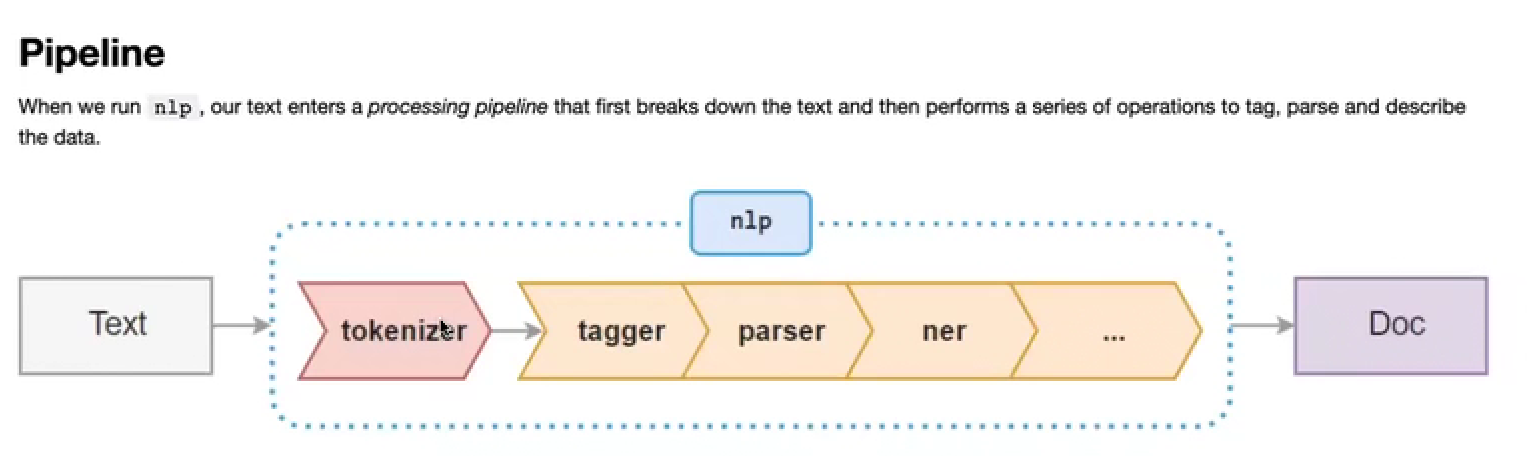

 Lemtext is our fine data let us try with spacy pipelines for final process.

In [ ]:
for index, row in CopyData.iterrows():
    lemtext = row['Lemtext']
    doc = nlp(lemtext)
    text = doc.text  # Get the processed text as a string
    CopyData.at[index, 'FinalData'] = text

In [ ]:
CopyData

,File,Content,JobPost,ProcessedText,Url,phone,CleanedText,Clean,Token,Lemtext,FinalData
0,React JS Developer_KotaniDurgaprasad[3_1] (1)-...,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React_JS,Kotani Durga Prasad Objective : Aspirant for a...,,,kotani durga prasad objective aspirant for a p...,kotani durga prasad objective aspirant positio...,"[kotani, durga, prasad, objective, aspirant, p...",kotani durga prasad objective aspirant positio...,kotani durga prasad objective aspirant positio...
1,React Dev_Krishna Kanth_Musquare Technologies....,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React_JS,Ui-Developer / React JS Developer NAME : KRISH...,,,uideveloper react js developer name krishna pr...,uideveloper react js developer name krishna pr...,"[uideveloper, react, js, developer, name, kris...",uideveloper react js developer name krishna pr...,uideveloper react js developer name krishna pr...
2,React Developer_Sarala Madasu-converted.docx,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React_JS,"SARALA MADASU SARALA MADASU  204 , Sri geethi...",,,sarala madasu sarala madasu sri geethika prest...,sarala madasu sarala madasu sri geethika prest...,"[sarala, madasu, sarala, madasu, sri, geethika...",sarala madasu sarala madasu sri geethika prest...,sarala madasu sarala madasu sri geethika prest...
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React_JS,HARIPRIYA BATTINA Experience as UI Developer i...,,9908576950,haripriya battina experience as ui developer i...,haripriya battina experience ui developer reac...,"[haripriya, battina, experience, ui, developer...",haripriya battina experience ui developer reac...,haripriya battina experience ui developer reac...
4,React Dev_Krishna Kanth.docx,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React_JS,Ui-Developer / React JS Developer NAME : KRISH...,,,uideveloper react js developer name krishna pr...,uideveloper react js developer name krishna pr...,"[uideveloper, react, js, developer, name, kris...",uideveloper react js developer name krishna pr...,uideveloper react js developer name krishna pr...
...,...,...,...,...,...,...,...,...,...,...,...
74,Srikanth-Hexaware.docx,Srikanth (WORKDAY hCM Consultant)\t ...,workday,Srikanth ( WORKDAY hCM Consultant ) Seeking su...,,,srikanth workday hcm consultant seeking suitab...,srikanth workday hcm consultant seeking suitab...,"[srikanth, workday, hcm, consultant, seeking, ...",srikanth workday hcm consultant seek suitable ...,srikanth workday hcm consultant seek suitable ...
75,SSKumar_Hexaware.docx,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday,WORKDAY | HCM | FCM Name : Kumar S . S Role : ...,,,workday hcm fcm name kumar s s role workday co...,workday hcm fcm name kumar role workday consul...,"[workday, hcm, fcm, name, kumar, role, workday...",workday hcm fcm name kumar role workday consul...,workday hcm fcm name kumar role workday consul...
76,Jyotiverma_Heaware.docx,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,workday,JYOTI VERMA PROFESSIONAL SUMMARY PROFESSIONAL ...,,,jyoti verma professional summary professional ...,jyoti verma professional summary professional ...,"[jyoti, verma, professional, summary, professi...",jyoti verma professional summary professional ...,jyoti verma professional summary professional ...
77,ChinnaSubbarayuduM_Hexaware.docx,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday,Chinna Subbarayudu M DOB : 06th March 1994 Nat...,,,chinna subbarayudu m dob march nationality ind...,chinna subbarayudu dob march nationality india...,"[chinna, subbarayudu, dob, march, nationality,...",chinna subbarayudu dob march nationality india...,chinna subbarayudu dob march nationality india...


### Ngrams

See if we use BBOW,BOW it cannot understand the actual meaning of sentence since it will not take care of order of words so let us go fo Ngrams(2 or 3)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
Finaltext=np.array(CopyData['FinalData'])

In [ ]:
cv=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=4000)
bow_matrix_ngram=cv.fit_transform(Finaltext)

In [ ]:
bow_matrix_ngram

<79x4000 sparse matrix of type '<class 'numpy.int64'>'
	with 29406 stored elements in Compressed Sparse Row format>

In [ ]:
cv.get_feature_names_out()

array(['ability', 'ability work', 'ability work team', ...,
       'year professional', 'year professional experience',
       'year workday'], dtype=object)

In [ ]:

sum_words = bow_matrix_ngram.sum(axis=0)
words_frequency = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_frequency =sorted(words_frequency, key = lambda x: x[1], reverse=True)
df = pd.DataFrame(words_frequency)
df.columns = ['Words', 'Count']

df[0:10]

,Words,Count
0,experience,637
1,application,531
2,report,530
3,use,503
4,work,489
5,server,485
6,peoplesoft,453
7,workday,427
8,project,387
9,create,382


<Axes: title={'center': 'Top verbs and nouns'}, xlabel='Words'>

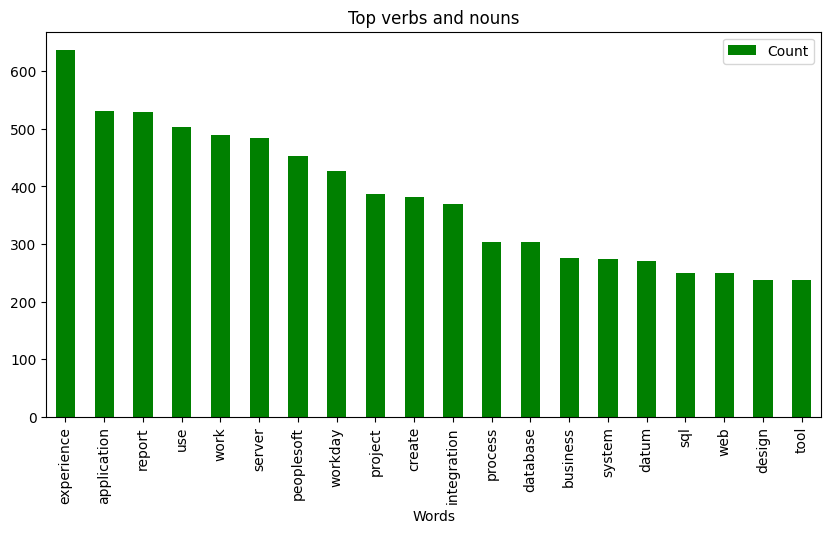

In [ ]:
df[0:20].plot.bar(x='Words', figsize=(10,5), title='Top verbs and nouns',color='green')

In [ ]:
feature_names = cv.get_feature_names_out()
print(feature_names[100:200])

['application create multiple' 'application database' 'application design'
 'application design many' 'application designer'
 'application designer application' 'application designer datum'
 'application development' 'application engine' 'application engine load'
 'application engine people' 'application engine program'
 'application issue' 'application issue problem' 'application level'
 'application management' 'application management task'
 'application package' 'application package peoplesoft'
 'application peoplesoft' 'application server' 'application server cache'
 'application server domain' 'application server process'
 'application server web' 'application upgrade' 'application use'
 'application version' 'application work' 'apply' 'apply application'
 'apply bundle' 'apply environment' 'apply environment maintain'
 'apply fix' 'apply fix patch' 'apply patch' 'apply patch bundle'
 'apply patch fix' 'apply pum' 'apply pum image' 'apply tax'
 'apply tax update' 'approach' 'appro

In [ ]:
print(bow_matrix_ngram.toarray())

[[3 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [ ]:
Countvector=pd.DataFrame(bow_matrix_ngram.toarray(),columns=cv.get_feature_names_out())


In [ ]:
Countvector

,ability,ability work,ability work team,absence,absence management,academic,accenture,acceptance,access,access people,...,year,year experience,year experience peoplesoft,year experience workday,year extensive,year month,year pass,year professional,year professional experience,year workday
0,3,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,3,2,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,3,2,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,1,0,0,7,0,0,0,0,2,0,...,3,1,0,0,0,0,0,0,0,1
75,0,0,0,1,0,0,0,0,1,0,...,1,1,0,1,0,0,0,0,0,0
76,1,0,0,0,0,0,0,0,0,0,...,6,1,0,1,0,0,0,0,0,0
77,0,0,0,0,0,0,0,1,0,0,...,2,2,0,1,0,0,0,0,0,0


In [ ]:
Data=new_df = CopyData[['JobPost', 'FinalData']]

In [ ]:
Data

,JobPost,FinalData
0,React_JS,kotani durga prasad objective aspirant positio...
1,React_JS,uideveloper react js developer name krishna pr...
2,React_JS,sarala madasu sarala madasu sri geethika prest...
3,React_JS,haripriya battina experience ui developer reac...
4,React_JS,uideveloper react js developer name krishna pr...
...,...,...
74,workday,srikanth workday hcm consultant seek suitable ...
75,workday,workday hcm fcm name kumar role workday consul...
76,workday,jyoti verma professional summary professional ...
77,workday,chinna subbarayudu dob march nationality india...


### WordCloud

In [ ]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

In [ ]:
value_counts = CopyData['JobPost'].value_counts()

In [ ]:
value_counts

React_JS                           24
workday                            21
Peoplesoft                         20
SQL Developer Lightning insight    14
Name: JobPost, dtype: int64

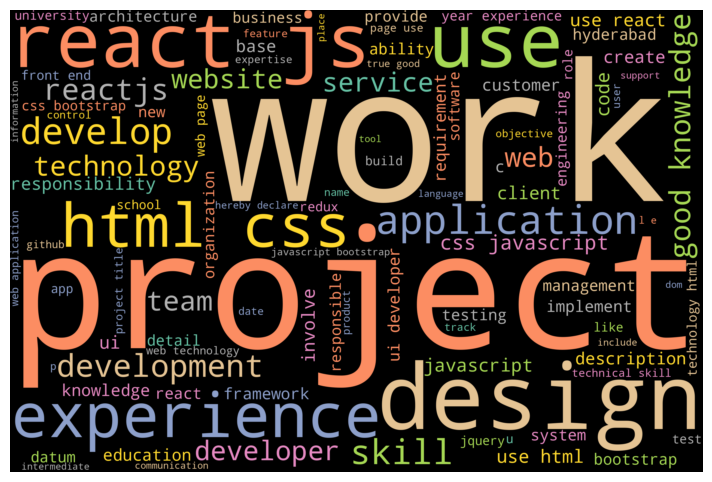

In [ ]:
react_js_data = Data[Data['JobPost'] == 'React_JS']  # Filter rows where JobPost is 'React_JS'
words = np.array(react_js_data['FinalData'])
words = words.astype(str)  # Convert to string type

# Generate word cloud
wordcloud = WordCloud(width=3000, height=2000, background_color='black', max_words=100, colormap='Set2', stopwords=stopwords).generate(' '.join(words))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

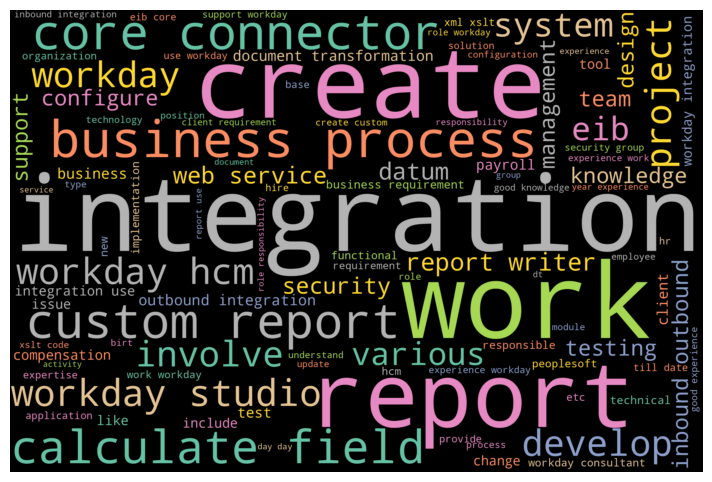

In [ ]:
workday = Data[Data['JobPost'] == 'workday']  # Filter rows where JobPost is 'React_JS'
words = np.array(workday['FinalData'])
words = words.astype(str)  # Convert to string type

# Generate word cloud
wordcloud = WordCloud(width=3000, height=2000, background_color='black', max_words=100, colormap='Set2', stopwords=stopwords).generate(' '.join(words))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

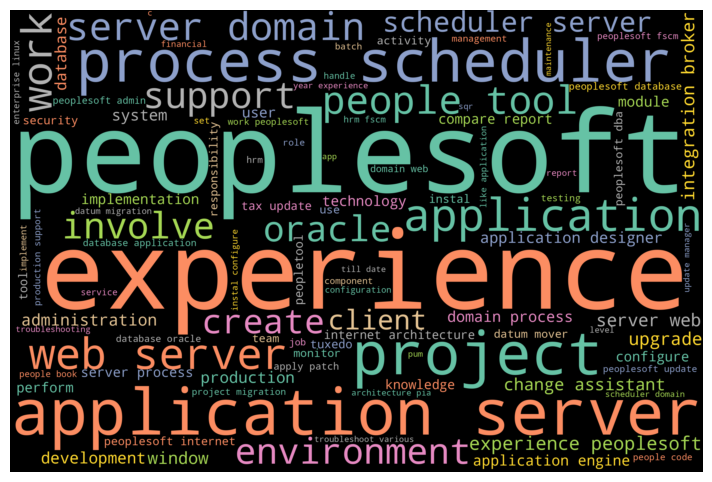

In [ ]:
Peoplesoft = Data[Data['JobPost'] == 'Peoplesoft']  # Filter rows where JobPost is 'React_JS'
words = np.array(Peoplesoft['FinalData'])
words = words.astype(str)  # Convert to string type

# Generate word cloud
wordcloud = WordCloud(width=3000, height=2000, background_color='black', max_words=100, colormap='Set2', stopwords=stopwords).generate(' '.join(words))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

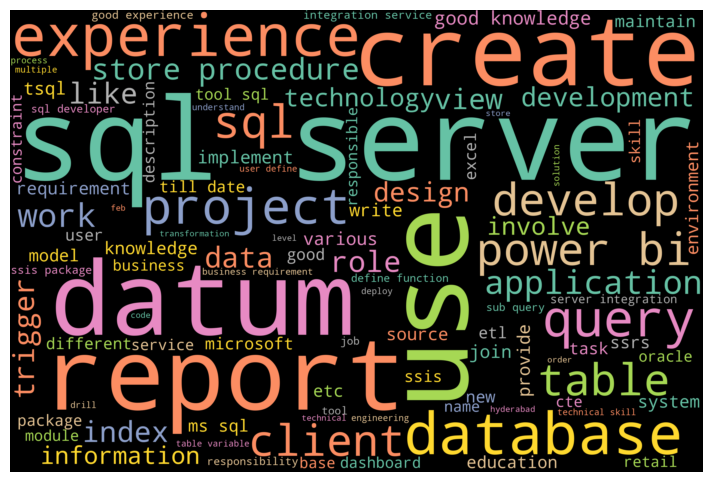

In [ ]:
SQL = Data[Data['JobPost'] == 'SQL Developer Lightning insight']  # Filter rows where JobPost is 'React_JS'
words = np.array(SQL['FinalData'])
words = words.astype(str)  # Convert to string type

# Generate word cloud
wordcloud = WordCloud(width=3000, height=2000, background_color='black', max_words=100, colormap='Set2', stopwords=stopwords).generate(' '.join(words))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### TF-IDF VECTORISER

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
b=np.array(Data["FinalData"])

In [ ]:
tv=TfidfVectorizer()
b=tv.fit_transform(b).toarray()
tv.vocabulary_

{'kotani': 1888,
 'durga': 1053,
 'prasad': 2630,
 'objective': 2342,
 'aspirant': 240,
 'position': 2608,
 'organization': 2413,
 'contribute': 734,
 'skill': 3213,
 'success': 3395,
 'synchronize': 3444,
 'new': 2290,
 'technology': 3504,
 'resourceful': 2953,
 'innovative': 1715,
 'flexible': 1327,
 'professional': 2697,
 'summary': 3409,
 'year': 3937,
 'experience': 1233,
 'software': 3236,
 'engineer': 1149,
 'highly': 1559,
 'creative': 790,
 'web': 3849,
 'designer': 946,
 'front': 1369,
 'end': 1136,
 'developer': 961,
 'work': 3896,
 'diverse': 1013,
 'range': 2813,
 'project': 2710,
 'small': 3223,
 'business': 465,
 'website': 3857,
 'large': 1913,
 'scale': 3063,
 'global': 1438,
 'user': 3715,
 'base': 341,
 'excellent': 1213,
 'knowledge': 1885,
 'html': 1608,
 'css': 817,
 'bootstrap': 421,
 'framework': 1361,
 'strong': 3369,
 'hand': 1513,
 'code': 607,
 'good': 1457,
 'design': 943,
 'develop': 959,
 'page': 2455,
 'seo': 3123,
 'search': 3098,
 'engine': 1148,
 'opt

In [ ]:
TFIDF=pd.DataFrame(b,columns=tv.get_feature_names_out())
TFIDF

,abdul,ability,able,abovementione,abreast,abs,absence,absent,abstract,abstraction,...,yonder,york,young,yrs,zealand,zenefit,zero,zerozilla,zone,zp
0,0.0,0.055570,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.023091,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.068347,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.169895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.0,0.016011,0.0,0.000000,0.0,0.0,0.169441,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,0.0,0.000000,0.0,0.000000,0.0,0.0,0.020152,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,0.0,0.020756,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Pickle file creation for TF-IDF Vectorizer

In [ ]:
import pickle

In [ ]:
file_path = "vectorizer.pkl"

In [ ]:
with open(file_path, "wb") as f:
    pickle.dump(tv, f)

In [ ]:
print("TFIDFModel saved as a pickle file.")

TFIDFModel saved as a pickle file.


### Label Encoder

In [ ]:
Data

,JobPost,FinalData
0,React_JS,kotani durga prasad objective aspirant positio...
1,React_JS,uideveloper react js developer name krishna pr...
2,React_JS,sarala madasu sarala madasu sri geethika prest...
3,React_JS,haripriya battina experience ui developer reac...
4,React_JS,uideveloper react js developer name krishna pr...
...,...,...
74,workday,srikanth workday hcm consultant seek suitable ...
75,workday,workday hcm fcm name kumar role workday consul...
76,workday,jyoti verma professional summary professional ...
77,workday,chinna subbarayudu dob march nationality india...


In [ ]:
Data['JobPost'].unique()

array(['React_JS', 'SQL Developer Lightning insight', 'Peoplesoft',
       'workday'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label= LabelEncoder()
Data['JobPost']=label.fit_transform(Data['JobPost'])

<ipython-input-109-044c621d547a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['JobPost']=label.fit_transform(Data['JobPost'])


In [ ]:
Data['JobPost'].unique()

array([1, 2, 0, 3])

0----->Peoplesoft         

1----->React_JS

2----->SQL Developer Lightning insight

3----->workday                           

In [ ]:
Data

,JobPost,FinalData
0,1,kotani durga prasad objective aspirant positio...
1,1,uideveloper react js developer name krishna pr...
2,1,sarala madasu sarala madasu sri geethika prest...
3,1,haripriya battina experience ui developer reac...
4,1,uideveloper react js developer name krishna pr...
...,...,...
74,3,srikanth workday hcm consultant seek suitable ...
75,3,workday hcm fcm name kumar role workday consul...
76,3,jyoti verma professional summary professional ...
77,3,chinna subbarayudu dob march nationality india...


There are several advanced techniques and functions that can be beneficial for resume classification purposes. Here are a few commonly used techniques:

Word Embeddings: Word embeddings such as Word2Vec, GloVe, or fastText can capture the semantic meaning of words by representing them as dense vectors in a continuous space. These embeddings can be pre-trained on large corpora or fine-tuned on specific domain-specific data to enhance the representation of words in your resume classification task.

Text Vectorization: Instead of using simple word-based approaches, you can employ more advanced vectorization techniques such as TF-IDF (Term Frequency-Inverse Document Frequency), CountVectorizer, or TfidfVectorizer. These methods convert text data into numerical representations that can be used as input to machine learning models.

N-gram Modeling: N-gram modeling considers the contextual information of words by considering sequences of consecutive words. By including n-gram features, such as bi-grams or tri-grams, you can capture more context and potentially improve the performance of your classification models.

Named Entity Recognition (NER): NER techniques can identify and extract specific named entities from the resume text, such as names, organizations, locations, or job titles. This additional information can provide valuable features for classification or assist in structuring the resume data.

Deep Learning Models: Advanced deep learning models, such as recurrent neural networks (RNNs), long short-term memory (LSTM) networks, or transformers (e.g., BERT, GPT), have shown significant success in natural language processing tasks. These models can automatically learn intricate patterns and representations from text data, potentially improving the accuracy of resume classification.

### Train Test Split

Letus split our Data with text data and TFIDF vector too for testing because if we use Pipeline method as follows in upcoming steps we can do TF-IDF inside Pipeline only

In [ ]:
from sklearn.model_selection import train_test_split

By default, the train-test split in scikit-learn's train_test_split function is random. The percentage split between the training set and the test set can be controlled using the test_size parameter.

The test_size parameter specifies the proportion of the dataset that should be allocated for the test set. By default, it is set to 0.25, which means that 25% of the data will be used for testing, and the remaining 75% will be used for training.

Splitting Data DF

In [ ]:
XTrain_Data,XTest_Data,YTrain_Data,YTest_Data=train_test_split(Data['FinalData'],Data['JobPost'],random_state=42,test_size=0.20,stratify=Data['JobPost'])

Splitting TF-IDF VECTOR

In [ ]:
XTrain,XTest,YTrain,YTest=train_test_split(TFIDF,Data['JobPost'],random_state=42,test_size=0.20,stratify=Data['JobPost'])

But you can use either one above so if you are using saperately then use second one else if using pipeline use Firstone.

In [ ]:
print('Train & Test Split is:')
XTrain.shape, XTest.shape

Train & Test Split is:


((63, 3954), (16, 3954))

## Model Building

#### Model 1 logistic regression

Let us start with Logistics Regression

So let us do the Logistics Regression using a pipeline model....

In [ ]:
pip install pipeline

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LRmodelpipeline=Pipeline([('tfidf',TfidfVectorizer()),('clf',LogisticRegression())])

In [ ]:
LRmodelpipeline.fit(XTrain_Data,YTrain_Data)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [ ]:
YTrue=LRmodelpipeline.predict(XTest_Data)

OHHHHH!!!!!!!!!! Vivek  so let us go for model performance by analysing classification_report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
LR_Report=classification_report(YTrue,YTest_Data)

In [ ]:
print(LR_Report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.83      0.91         6
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.92      0.96      0.93        16
weighted avg       0.96      0.94      0.94        16



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
cmlr=confusion_matrix(YTrue,YTest)

In [ ]:
cmlr

array([[4, 0, 0, 0],
       [0, 5, 1, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 4]])

The element in the first row and first column (4) represents the number of true positives (TP) for the first class.


The element in the second row and second column (5) represents the number of true positives (TP) for the second class.


The element in the third row and third column (3) represents the number of true positives (TP) for the third class.

The element in the fourth row and fourth column (4) represents the number of true positives (TP) for the fourth class.

In [ ]:
import seaborn as sns

Text(50.722222222222214, 0.5, 'Actual')

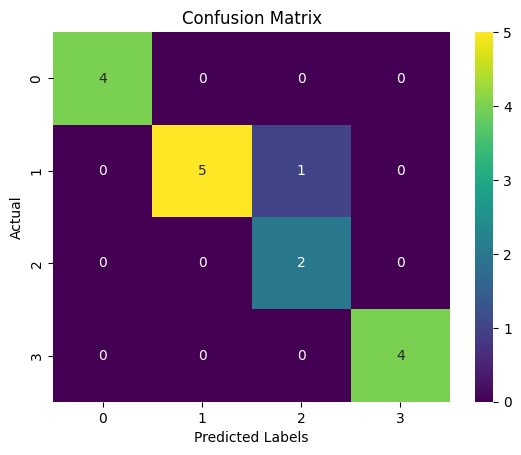

In [ ]:
sns.heatmap(cmlr,annot=True,cmap='viridis')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual")

from f1 score(classification_report) and confusion matrix this model is good

#### Model 2 Decision Tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

Let us perform GCV for DT Classifier

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1,10),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

since GCV does not have any random state we will set a random state by generating random seed

In [ ]:
import random

In [ ]:
np.random.seed(42)
random.seed(42)

In [ ]:
gcvdt=GridSearchCV(dt,param_grid,cv=5)

In [ ]:
gcvdt.fit(XTrain,YTrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
gcvdt.best_params_,gcvdt.best_score_

({'criterion': 'gini',
  'max_depth': 5,
  'min_samples_leaf': 2,
  'min_samples_split': 2},
 0.9846153846153847)

In [ ]:
best_model_dt=gcvdt.best_estimator_

In [ ]:
best_model_dt

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2)

In [ ]:
best_model_dt.fit(XTrain,YTrain)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.83      0.91         6
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.92      0.96      0.93        16
weighted avg       0.96      0.94      0.94        16

[[4 0 0 0]
 [0 5 1 0]
 [0 0 2 0]
 [0 0 0 4]]


Text(50.722222222222214, 0.5, 'Actual')

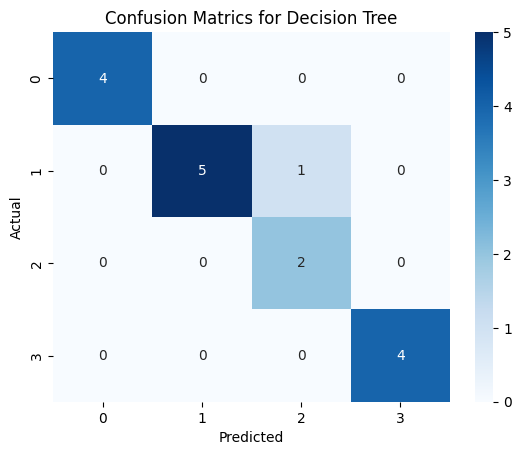

In [ ]:
YTruedt=best_model_dt.predict(XTest)
plt.title("Classification Report for Decision Tree")
DT_Report=classification_report(YTruedt,YTest)
print(DT_Report)
print("=====================================================================")
cmdt=confusion_matrix(YTruedt,YTest)
print(cmdt)
sns.heatmap(cmdt,annot=True,cmap='Blues')
plt.title("Confusion Matrics for Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
params={
    'n_estimators':[10,30,50],
    'max_depth':range(2,8),
    'min_samples_leaf':range(1,6),
    'min_samples_split':range(2,10)
}

Grid search cv for Randomforestclassifier(ensemble model)

In [ ]:
np.random.seed(42)
random.seed(42)

In [ ]:
RF=RandomForestClassifier()
gcvrf=GridSearchCV(estimator=RF,param_grid=params,cv=5)
gcvrf.fit(XTrain,YTrain)
print(gcvrf.best_params_,gcvrf.best_score_)
print("======================== ===== =====================")
best_model_rf=gcvrf.best_estimator_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50} 1.0
======================== ===== =====================


In [ ]:
best_model_rf.fit(XTrain,YTrain)

RandomForestClassifier(max_depth=4, min_samples_split=5, n_estimators=50)

Classification report for Random forest
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.71      0.83         7
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         4

    accuracy                           0.88        16
   macro avg       0.85      0.93      0.87        16
weighted avg       0.91      0.88      0.88        16

============= ======= =======================
[[3 0 0 0]
 [1 5 1 0]
 [0 0 2 0]
 [0 0 0 4]]


Text(50.722222222222214, 0.5, 'Actual')

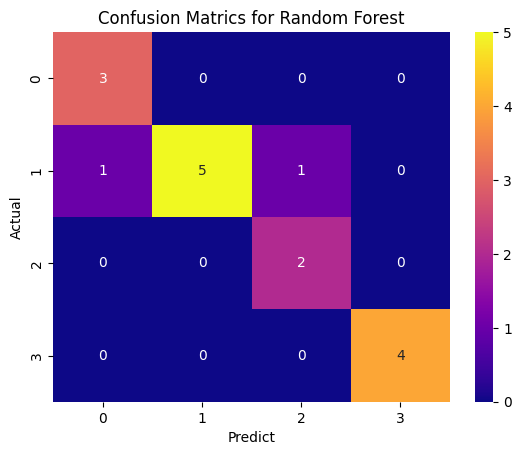

In [ ]:
Ytruerf=best_model_rf.predict(XTest)
print("Classification report for Random forest")
print(classification_report(Ytruerf,YTest))
print("============= ======= =======================")
cmrf=confusion_matrix(Ytruerf,YTest)
print(cmrf)
sns.heatmap(cmrf,annot=True,cmap='plasma')
plt.title("Confusion Matrics for Random Forest")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [ ]:
import pickle

In [ ]:
file_path = "modelrf.pkl"

In [ ]:
with open(file_path, "wb") as f:
    pickle.dump(best_model_rf, f)

In [ ]:
print("Model saved as a pickle file for Random Forest.")

Model saved as a pickle file for Random Forest.


#### XGBOOST

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
params={'learning_rate':[0.1,0.001,0.001],
        'max_depth':range(2,10),
        'n_estimators':[100,200,300]}

In [ ]:
xgb=xgb.XGBClassifier()

In [ ]:
np.random.seed(42)# creating random variable to generate random seed for same o/p in all re run condition to
                  #avoid different o/p or model parameters.
random.seed(42)

In [ ]:
gcvxgb=GridSearchCV(estimator=xgb,param_grid=params,cv=5)

In [ ]:
gcvxgb.fit(XTrain,YTrain)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...ne,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.001, 0.001],
                         'max_depth': range(2, 10),
                         'n_estimators': [100, 200, 300]})

In [ ]:
gcvxgb.best_params_,gcvxgb.best_score_

({'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100},
 0.9038461538461539)

In [ ]:
best_model_xgb=gcvxgb.best_estimator_

In [ ]:
best_model_xgb.fit(XTrain,YTrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

Classification report for XGBoost
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.62      0.77         8
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         4

    accuracy                           0.81        16
   macro avg       0.79      0.91      0.81        16
weighted avg       0.90      0.81      0.82        16

============= ======= =======================
[[2 0 0 0]
 [2 5 1 0]
 [0 0 2 0]
 [0 0 0 4]]


Text(50.722222222222214, 0.5, 'Actual')

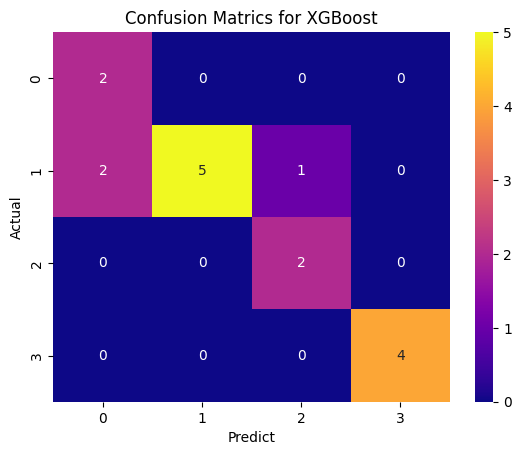

In [ ]:
Ytruexgb=best_model_xgb.predict(XTest)
print("Classification report for XGBoost")
print(classification_report(Ytruexgb,YTest))
print("============= ======= =======================")
cmxgb=confusion_matrix(Ytruexgb,YTest)
print(cmxgb)
sns.heatmap(cmxgb,annot=True,cmap='plasma')
plt.title("Confusion Matrics for XGBoost")
plt.xlabel("Predict")
plt.ylabel("Actual")

#### ADABOOST Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
params={'learning_rate':[0.001,0.01,0.1],
               'n_estimators':[100,150,200,300]}

In [ ]:
np.random.seed(42)# creating random variable to generate random seed for same o/p in all re run condition to
                  #avoid different o/p or model parameters.
random.seed(42)

In [ ]:
ADA=AdaBoostClassifier()
gcvada=GridSearchCV(estimator=ADA,param_grid=params,cv=5)
gcvada.fit(XTrain,YTrain)
print(gcvada.best_params_,gcvada.best_score_)
print("======================== ===== =====================")
best_model_ada=gcvada.best_estimator_

{'learning_rate': 0.001, 'n_estimators': 100} 0.9538461538461538
======================== ===== =====================


Classification report for AdaBoost
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.62      0.77         8
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         4

    accuracy                           0.81        16
   macro avg       0.79      0.91      0.81        16
weighted avg       0.90      0.81      0.82        16

============= ======= =======================
[[2 0 0 0]
 [2 5 1 0]
 [0 0 2 0]
 [0 0 0 4]]


Text(50.722222222222214, 0.5, 'Actual')

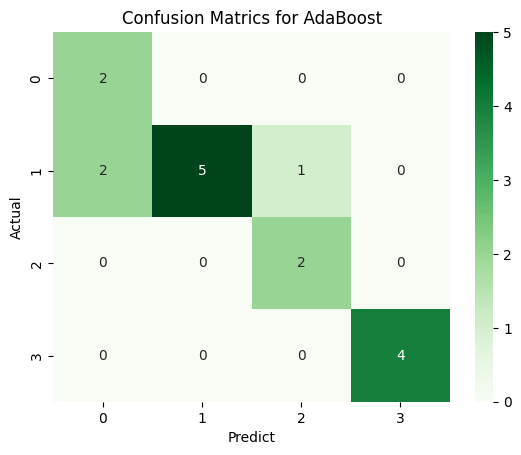

In [ ]:
best_model_ada.fit(XTrain,YTrain)
Ytrueada=best_model_ada.predict(XTest)
print("Classification report for AdaBoost")
print(classification_report(Ytrueada,YTest))
print("============= ======= =======================")
cmada=confusion_matrix(Ytrueada,YTest)
print(cmada)
sns.heatmap(cmada,annot=True,cmap='Greens')
plt.title("Confusion Matrics for AdaBoost")
plt.xlabel("Predict")
plt.ylabel("Actual")

#### SVM Model

In [ ]:
from sklearn.svm import SVC

In [ ]:
import numpy as np

In [ ]:
import random

In [ ]:
svm=SVC()

In [ ]:
params={'C':[0.1,1,10],
        'kernel':['linear','rbf'],
        'gamma':[0.1,1,10]}

In [ ]:
np.random.seed(42)# creating random variable to generate random seed for same o/p in all re run condition to
                  #avoid different o/p or model parameters.
random.seed(42)

In [ ]:
gcvsvm=GridSearchCV(estimator=svm,param_grid=params,cv=5)
gcvsvm.fit(XTrain,YTrain)
gcvsvm.best_params_,gcvsvm.best_score_

({'C': 1, 'gamma': 0.1, 'kernel': 'linear'}, 1.0)

Classification report for SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.83      0.91         6
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.92      0.96      0.93        16
weighted avg       0.96      0.94      0.94        16

============= ======= =======================
[[4 0 0 0]
 [0 5 1 0]
 [0 0 2 0]
 [0 0 0 4]]


Text(50.722222222222214, 0.5, 'Actual')

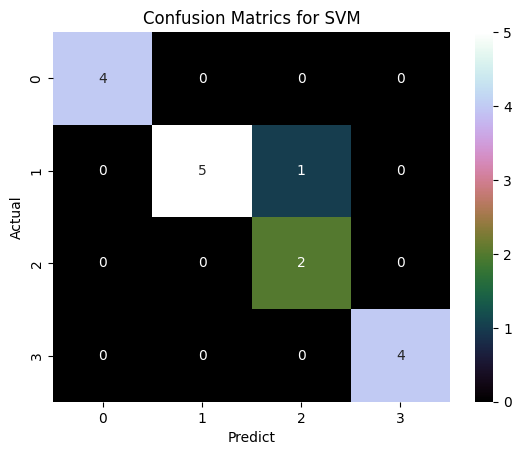

In [ ]:
best_model_svm=gcvsvm.best_estimator_
best_model_svm.fit(XTrain,YTrain)
Ytruesvm=best_model_svm.predict(XTest)
print("Classification report for SVM")
print(classification_report(Ytruesvm,YTest))
print("============= ======= =======================")
cmsvm=confusion_matrix(Ytruesvm,YTest)
print(cmsvm)
sns.heatmap(cmsvm,annot=True,cmap='cubehelix')
plt.title("Confusion Matrics for SVM")
plt.xlabel("Predict")
plt.ylabel("Actual")

#### Linear SVC

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
lsvm=LinearSVC()

In [ ]:
params={'C':[0.1,1,10]}

In [ ]:
gcvlsvm=GridSearchCV(estimator=lsvm,param_grid=params,cv=5)

In [ ]:
gcvlsvm.fit(XTrain,YTrain)
gcvlsvm.best_params_,gcvlsvm.best_score_

({'C': 1}, 1.0)

Classification report for LinearSVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.83      0.91         6
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.92      0.96      0.93        16
weighted avg       0.96      0.94      0.94        16

============= ======= =======================
[[4 0 0 0]
 [0 5 1 0]
 [0 0 2 0]
 [0 0 0 4]]


Text(50.722222222222214, 0.5, 'Actual')

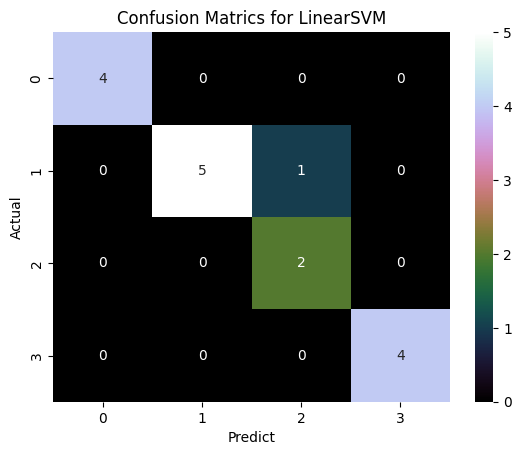

In [ ]:
best_lsvm_model=gcvlsvm.best_estimator_
best_lsvm_model.fit(XTrain,YTrain)
Ytruelsvm=best_lsvm_model.predict(XTest)
print("Classification report for LinearSVM")
print(classification_report(Ytruelsvm,YTest))
print("============= ======= =======================")
cmlsvm=confusion_matrix(Ytruelsvm,YTest)
print(cmlsvm)
sns.heatmap(cmlsvm,annot=True,cmap='cubehelix')
plt.title("Confusion Matrics for LinearSVM")
plt.xlabel("Predict")
plt.ylabel("Actual")

Ohk....the Linear SVC model shows perfect classification

In [ ]:
import pickle

In [ ]:
file_path = "modellsvc.pkl"

In [ ]:
with open(file_path, "wb") as f:
    pickle.dump(best_lsvm_model, f)

In [ ]:
print("Model saved as a pickle file for linear SVM.")

Model saved as a pickle file for linear SVM.


### Neural Networks Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.preprocessing import sequence
#from keras.utils import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [ ]:
 from sklearn.model_selection import KFold

In [ ]:
from keras.layers import Dropout

In [ ]:
# create model
def create_model():
    modelnn = Sequential()
    modelnn.add(Dense(4000, input_dim=3954, kernel_initializer='random_uniform', activation='relu'))
    modelnn.add(Dense(2000, kernel_initializer='random_uniform', activation='relu'))
    modelnn.add(Dense(2000, kernel_initializer='random_uniform', activation='relu'))
    modelnn.add(Dense(1000, kernel_initializer='random_uniform', activation='relu'))
    modelnn.add(Dense(4, kernel_initializer='random_uniform', activation='softmax'))

    adam=Adam(lr=0.01)
    modelnn.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return modelnn

In [ ]:
modelnn = KerasClassifier(build_fn = create_model,verbose = 0)

<ipython-input-190-e6bc50b0df55>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelnn = KerasClassifier(build_fn = create_model,verbose = 0)


Softmax Activation: The softmax activation function is often used in multi-class classification problems. It normalizes the outputs of the neurons in the output layer to represent class probabilities. The softmax function ensures that the sum of the predicted probabilities across all classes is equal to 1, making it suitable for multi-class classification. It is typically used when the classes are mutually exclusive, meaning each input can only belong to one class.

#### Hyper parameter tuning for batch size and epochs

In [ ]:
import random

In [ ]:
np.random.seed(42)# creating random variable to generate random seed for same o/p in all re run condition to
                  #avoid different o/p or model parameters.
random.seed(42)

In [ ]:
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
gridnn = GridSearchCV(estimator = modelnn,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_resultnn = gridnn.fit(XTest.values,YTest)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................


[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.750 total time=  10.8s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/wrappers/scikit_learn.py", line 329, in score
    outputs = self.model.evaluate(x, y, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_filethbtyyad.py", line 15, in tf__test_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag_

[CV 2/5; 1/9] END .......batch_size=10, epochs=10;, score=nan total time=  12.2s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/wrappers/scikit_learn.py", line 329, in score
    outputs = self.model.evaluate(x, y, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_filethbtyyad.py", line 15, in tf__test_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag_

[CV 3/5; 1/9] END .......batch_size=10, epochs=10;, score=nan total time=  11.7s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................


[CV 4/5; 1/9] END .......batch_size=10, epochs=10;, score=nan total time=  11.8s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................


[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=1.000 total time=   9.8s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................


[CV 1/5; 2/9] END .....batch_size=10, epochs=50;, score=0.750 total time=  43.0s
[CV 2/5; 2/9] START batch_size=10, epochs=50....................................


[CV 2/5; 2/9] END .......batch_size=10, epochs=50;, score=nan total time=  38.2s
[CV 3/5; 2/9] START batch_size=10, epochs=50....................................


[CV 3/5; 2/9] END .......batch_size=10, epochs=50;, score=nan total time=  42.5s
[CV 4/5; 2/9] START batch_size=10, epochs=50....................................


[CV 4/5; 2/9] END .......batch_size=10, epochs=50;, score=nan total time=  43.1s
[CV 5/5; 2/9] START batch_size=10, epochs=50....................................


[CV 5/5; 2/9] END .....batch_size=10, epochs=50;, score=1.000 total time=  42.7s
[CV 1/5; 3/9] START batch_size=10, epochs=100...................................


[CV 1/5; 3/9] END ....batch_size=10, epochs=100;, score=0.750 total time= 1.3min
[CV 2/5; 3/9] START batch_size=10, epochs=100...................................


[CV 2/5; 3/9] END ......batch_size=10, epochs=100;, score=nan total time= 1.4min
[CV 3/5; 3/9] START batch_size=10, epochs=100...................................


[CV 3/5; 3/9] END ......batch_size=10, epochs=100;, score=nan total time= 1.4min
[CV 4/5; 3/9] START batch_size=10, epochs=100...................................


[CV 4/5; 3/9] END ......batch_size=10, epochs=100;, score=nan total time= 1.4min
[CV 5/5; 3/9] START batch_size=10, epochs=100...................................


[CV 5/5; 3/9] END ....batch_size=10, epochs=100;, score=1.000 total time= 1.4min
[CV 1/5; 4/9] START batch_size=20, epochs=10....................................


[CV 1/5; 4/9] END .....batch_size=20, epochs=10;, score=0.750 total time=   5.2s
[CV 2/5; 4/9] START batch_size=20, epochs=10....................................


[CV 2/5; 4/9] END .......batch_size=20, epochs=10;, score=nan total time=   7.6s
[CV 3/5; 4/9] START batch_size=20, epochs=10....................................


[CV 3/5; 4/9] END .......batch_size=20, epochs=10;, score=nan total time=   4.5s
[CV 4/5; 4/9] START batch_size=20, epochs=10....................................


[CV 4/5; 4/9] END .......batch_size=20, epochs=10;, score=nan total time=   6.6s
[CV 5/5; 4/9] START batch_size=20, epochs=10....................................


[CV 5/5; 4/9] END .....batch_size=20, epochs=10;, score=1.000 total time=   4.6s
[CV 1/5; 5/9] START batch_size=20, epochs=50....................................


[CV 1/5; 5/9] END .....batch_size=20, epochs=50;, score=0.750 total time=  22.1s
[CV 2/5; 5/9] START batch_size=20, epochs=50....................................


[CV 2/5; 5/9] END .......batch_size=20, epochs=50;, score=nan total time=  21.9s
[CV 3/5; 5/9] START batch_size=20, epochs=50....................................


[CV 3/5; 5/9] END .......batch_size=20, epochs=50;, score=nan total time=  17.8s
[CV 4/5; 5/9] START batch_size=20, epochs=50....................................


[CV 4/5; 5/9] END .......batch_size=20, epochs=50;, score=nan total time=  21.9s
[CV 5/5; 5/9] START batch_size=20, epochs=50....................................


[CV 5/5; 5/9] END .....batch_size=20, epochs=50;, score=1.000 total time=  22.1s
[CV 1/5; 6/9] START batch_size=20, epochs=100...................................


[CV 1/5; 6/9] END ....batch_size=20, epochs=100;, score=0.750 total time=  42.6s
[CV 2/5; 6/9] START batch_size=20, epochs=100...................................


[CV 2/5; 6/9] END ......batch_size=20, epochs=100;, score=nan total time=  42.5s
[CV 3/5; 6/9] START batch_size=20, epochs=100...................................


[CV 3/5; 6/9] END ......batch_size=20, epochs=100;, score=nan total time=  42.5s
[CV 4/5; 6/9] START batch_size=20, epochs=100...................................


[CV 4/5; 6/9] END ......batch_size=20, epochs=100;, score=nan total time=  37.4s
[CV 5/5; 6/9] START batch_size=20, epochs=100...................................


[CV 5/5; 6/9] END ....batch_size=20, epochs=100;, score=1.000 total time=  42.8s
[CV 1/5; 7/9] START batch_size=40, epochs=10....................................


[CV 1/5; 7/9] END .....batch_size=40, epochs=10;, score=0.750 total time=   5.7s
[CV 2/5; 7/9] START batch_size=40, epochs=10....................................


[CV 2/5; 7/9] END .......batch_size=40, epochs=10;, score=nan total time=   6.7s
[CV 3/5; 7/9] START batch_size=40, epochs=10....................................


[CV 3/5; 7/9] END .......batch_size=40, epochs=10;, score=nan total time=   7.7s
[CV 4/5; 7/9] START batch_size=40, epochs=10....................................


[CV 4/5; 7/9] END .......batch_size=40, epochs=10;, score=nan total time=   8.7s
[CV 5/5; 7/9] START batch_size=40, epochs=10....................................


[CV 5/5; 7/9] END .....batch_size=40, epochs=10;, score=1.000 total time=   6.9s
[CV 1/5; 8/9] START batch_size=40, epochs=50....................................


[CV 1/5; 8/9] END .....batch_size=40, epochs=50;, score=0.750 total time=  22.1s
[CV 2/5; 8/9] START batch_size=40, epochs=50....................................


[CV 2/5; 8/9] END .......batch_size=40, epochs=50;, score=nan total time=  22.0s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................


[CV 3/5; 8/9] END .......batch_size=40, epochs=50;, score=nan total time=  22.0s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................


[CV 4/5; 8/9] END .......batch_size=40, epochs=50;, score=nan total time=  22.0s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................


[CV 5/5; 8/9] END .....batch_size=40, epochs=50;, score=1.000 total time=  22.5s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................


[CV 1/5; 9/9] END ....batch_size=40, epochs=100;, score=0.750 total time=  33.4s
[CV 2/5; 9/9] START batch_size=40, epochs=100...................................


[CV 2/5; 9/9] END ......batch_size=40, epochs=100;, score=nan total time=  42.4s
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................


[CV 3/5; 9/9] END ......batch_size=40, epochs=100;, score=nan total time=  34.1s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................


[CV 4/5; 9/9] END ......batch_size=40, epochs=100;, score=nan total time=  42.5s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................


[CV 5/5; 9/9] END ....batch_size=40, epochs=100;, score=1.000 total time=  40.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [ ]:
print('Best : {}, using {}'.format(grid_resultnn.best_score_,grid_resultnn.best_params_))
means = grid_resultnn.cv_results_['mean_test_score']
stds = grid_resultnn.cv_results_['std_test_score']
params = grid_resultnn.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : nan, using {'batch_size': 10, 'epochs': 10}
nan,nan with: {'batch_size': 10, 'epochs': 10}
nan,nan with: {'batch_size': 10, 'epochs': 50}
nan,nan with: {'batch_size': 10, 'epochs': 100}
nan,nan with: {'batch_size': 20, 'epochs': 10}
nan,nan with: {'batch_size': 20, 'epochs': 50}
nan,nan with: {'batch_size': 20, 'epochs': 100}
nan,nan with: {'batch_size': 40, 'epochs': 10}
nan,nan with: {'batch_size': 40, 'epochs': 50}
nan,nan with: {'batch_size': 40, 'epochs': 100}


In [ ]:
print('Best F1 Score:', grid_resultnn.best_score_)
print('Best Parameters:', grid_resultnn.best_params_)

Best F1 Score: nan
Best Parameters: {'batch_size': 10, 'epochs': 10}


#### Tuning of Hyperparameters:- Learning rate and Drop out rate

In [ ]:
def create_model2(learning_rate, dropout_rate):
    modelnn2 = Sequential()
    modelnn2.add(Dense(4000, input_dim=3954, kernel_initializer='random_uniform', activation='relu'))
    modelnn2.add(Dropout(dropout_rate))
    modelnn2.add(Dense(2000, kernel_initializer='random_uniform', activation='relu'))
    modelnn2.add(Dropout(dropout_rate))
    modelnn2.add(Dense(2000, kernel_initializer='random_uniform', activation='relu'))
    modelnn2.add(Dropout(dropout_rate))
    modelnn2.add(Dense(1000, kernel_initializer='random_uniform', activation='relu'))
    modelnn2.add(Dropout(dropout_rate))
    modelnn2.add(Dense(4, kernel_initializer='random_uniform', activation='softmax'))

    adam = Adam(lr=learning_rate)
    modelnn2.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return modelnn2

modelnn2 = KerasClassifier(build_fn=create_model2, batch_size=10, epochs=10, verbose=0)

<ipython-input-196-f3edb166b3fa>:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelnn2 = KerasClassifier(build_fn=create_model2, batch_size=10, epochs=10, verbose=0)


In [ ]:
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.1,0.2]
params=dict(learning_rate=learning_rate,dropout_rate=dropout_rate)

In [ ]:
gridnn2 = GridSearchCV(estimator = modelnn2,param_grid = params,cv = KFold(),verbose = 10)
grid_resultnn2 = gridnn2.fit(XTest.values,YTest)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 1/5; 1/6] END dropout_rate=0.1, learning_rate=0.001;, score=0.750 total time=  12.1s
[CV 2/5; 1/6] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 2/5; 1/6] END dropout_rate=0.1, learning_rate=0.001;, score=nan total time=  12.0s
[CV 3/5; 1/6] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 3/5; 1/6] END dropout_rate=0.1, learning_rate=0.001;, score=nan total time=   9.9s
[CV 4/5; 1/6] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 4/5; 1/6] END dropout_rate=0.1, learning_rate=0.001;, score=nan total time=   8.9s
[CV 5/5; 1/6] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 5/5; 1/6] END dropout_rate=0.1, learning_rate=0.001;, score=1.000 total time=  12.3s
[CV 1/5; 2/6] START dropout_rate=0.1, learning_rate=0.01........................


[CV 1/5; 2/6] END dropout_rate=0.1, learning_rate=0.01;, score=0.750 total time=  12.2s
[CV 2/5; 2/6] START dropout_rate=0.1, learning_rate=0.01........................


[CV 2/5; 2/6] END dropout_rate=0.1, learning_rate=0.01;, score=nan total time=  11.9s
[CV 3/5; 2/6] START dropout_rate=0.1, learning_rate=0.01........................


[CV 3/5; 2/6] END dropout_rate=0.1, learning_rate=0.01;, score=nan total time=  11.8s
[CV 4/5; 2/6] START dropout_rate=0.1, learning_rate=0.01........................


[CV 4/5; 2/6] END dropout_rate=0.1, learning_rate=0.01;, score=nan total time=  11.9s
[CV 5/5; 2/6] START dropout_rate=0.1, learning_rate=0.01........................


[CV 5/5; 2/6] END dropout_rate=0.1, learning_rate=0.01;, score=1.000 total time=   8.6s
[CV 1/5; 3/6] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 1/5; 3/6] END dropout_rate=0.1, learning_rate=0.1;, score=0.750 total time=   8.6s
[CV 2/5; 3/6] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 2/5; 3/6] END dropout_rate=0.1, learning_rate=0.1;, score=nan total time=   8.2s
[CV 3/5; 3/6] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 3/5; 3/6] END dropout_rate=0.1, learning_rate=0.1;, score=nan total time=  11.8s
[CV 4/5; 3/6] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 4/5; 3/6] END dropout_rate=0.1, learning_rate=0.1;, score=nan total time=  11.8s
[CV 5/5; 3/6] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 5/5; 3/6] END dropout_rate=0.1, learning_rate=0.1;, score=1.000 total time=  12.0s
[CV 1/5; 4/6] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 1/5; 4/6] END dropout_rate=0.2, learning_rate=0.001;, score=0.750 total time=  12.0s
[CV 2/5; 4/6] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 2/5; 4/6] END dropout_rate=0.2, learning_rate=0.001;, score=nan total time=  11.8s
[CV 3/5; 4/6] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 3/5; 4/6] END dropout_rate=0.2, learning_rate=0.001;, score=nan total time=  11.9s
[CV 4/5; 4/6] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 4/5; 4/6] END dropout_rate=0.2, learning_rate=0.001;, score=nan total time=  10.2s
[CV 5/5; 4/6] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 5/5; 4/6] END dropout_rate=0.2, learning_rate=0.001;, score=0.333 total time=  12.1s
[CV 1/5; 5/6] START dropout_rate=0.2, learning_rate=0.01........................


[CV 1/5; 5/6] END dropout_rate=0.2, learning_rate=0.01;, score=0.750 total time=  12.1s
[CV 2/5; 5/6] START dropout_rate=0.2, learning_rate=0.01........................


[CV 2/5; 5/6] END dropout_rate=0.2, learning_rate=0.01;, score=nan total time=  11.9s
[CV 3/5; 5/6] START dropout_rate=0.2, learning_rate=0.01........................


[CV 3/5; 5/6] END dropout_rate=0.2, learning_rate=0.01;, score=nan total time=  11.9s
[CV 4/5; 5/6] START dropout_rate=0.2, learning_rate=0.01........................


[CV 4/5; 5/6] END dropout_rate=0.2, learning_rate=0.01;, score=nan total time=   8.4s
[CV 5/5; 5/6] START dropout_rate=0.2, learning_rate=0.01........................


[CV 5/5; 5/6] END dropout_rate=0.2, learning_rate=0.01;, score=1.000 total time=  12.6s
[CV 1/5; 6/6] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 1/5; 6/6] END dropout_rate=0.2, learning_rate=0.1;, score=1.000 total time=   8.2s
[CV 2/5; 6/6] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 2/5; 6/6] END dropout_rate=0.2, learning_rate=0.1;, score=nan total time=   8.6s
[CV 3/5; 6/6] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 3/5; 6/6] END dropout_rate=0.2, learning_rate=0.1;, score=nan total time=  11.8s
[CV 4/5; 6/6] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 4/5; 6/6] END dropout_rate=0.2, learning_rate=0.1;, score=nan total time=   8.7s
[CV 5/5; 6/6] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 5/5; 6/6] END dropout_rate=0.2, learning_rate=0.1;, score=0.667 total time=  12.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


In [ ]:
print('Best : {}, using {}'.format(grid_resultnn2.best_score_,grid_resultnn2.best_params_))
means2 = grid_resultnn2.cv_results_['mean_test_score']
stds2 = grid_resultnn2.cv_results_['std_test_score']
params2= grid_resultnn2.cv_results_['params']
for mean2, stdev2, param2 in zip(means2, stds2, params2):
  print('{},{} with: {}'.format(mean2, stdev2, param2))

Best : nan, using {'dropout_rate': 0.1, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
nan,nan with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
nan,nan with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
nan,nan with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [ ]:
print('Best F1 Score:', grid_resultnn2.best_score_)
print('Best Parameters:', grid_resultnn2.best_params_)

Best F1 Score: nan
Best Parameters: {'dropout_rate': 0.1, 'learning_rate': 0.001}


#### Hyper parameter tuning for activation function and initializer

In [ ]:
# Define the grid search parameters
activation_function = ['relu','tanh','linear']
init = ['uniform','normal','zero']
params3 = dict(activation_function = activation_function,init = init)

In [ ]:
def create_model3(activation_function, init):
    modelnn3 = Sequential()
    modelnn3.add(Dense(4000, input_dim=3954, kernel_initializer=init, activation=activation_function))
    modelnn3.add(Dropout(0.1))
    modelnn3.add(Dense(2000, kernel_initializer=init, activation=activation_function))
    modelnn3.add(Dropout(0.1))
    modelnn3.add(Dense(2000, kernel_initializer=init, activation=activation_function))
    modelnn3.add(Dropout(0.1))
    modelnn3.add(Dense(1000, kernel_initializer=init, activation=activation_function))
    modelnn3.add(Dropout(0.1))
    modelnn3.add(Dense(4, kernel_initializer=init, activation='softmax'))

    adam = Adam(lr=0.001)
    modelnn3.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return modelnn3

modelnn3 = KerasClassifier(build_fn=create_model3, batch_size=10, epochs=10, verbose=0)

gridnn3 = GridSearchCV(estimator=modelnn3, param_grid=params3, cv=KFold(), verbose=10)
grid_resultnn3 = gridnn3.fit(XTest.values, YTest)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START activation_function=relu, init=uniform......................


<ipython-input-202-02f26a82c879>:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelnn3 = KerasClassifier(build_fn=create_model3, batch_size=10, epochs=10, verbose=0)


[CV 1/5; 1/9] END activation_function=relu, init=uniform;, score=0.750 total time=  12.0s
[CV 2/5; 1/9] START activation_function=relu, init=uniform......................


[CV 2/5; 1/9] END activation_function=relu, init=uniform;, score=nan total time=   8.8s
[CV 3/5; 1/9] START activation_function=relu, init=uniform......................


[CV 3/5; 1/9] END activation_function=relu, init=uniform;, score=nan total time=   9.8s
[CV 4/5; 1/9] START activation_function=relu, init=uniform......................


[CV 4/5; 1/9] END activation_function=relu, init=uniform;, score=nan total time=   9.3s
[CV 5/5; 1/9] START activation_function=relu, init=uniform......................


[CV 5/5; 1/9] END activation_function=relu, init=uniform;, score=1.000 total time=  12.7s
[CV 1/5; 2/9] START activation_function=relu, init=normal.......................


[CV 1/5; 2/9] END activation_function=relu, init=normal;, score=1.000 total time=  12.6s
[CV 2/5; 2/9] START activation_function=relu, init=normal.......................


[CV 2/5; 2/9] END activation_function=relu, init=normal;, score=nan total time=  12.2s
[CV 3/5; 2/9] START activation_function=relu, init=normal.......................


[CV 3/5; 2/9] END activation_function=relu, init=normal;, score=nan total time=  12.1s
[CV 4/5; 2/9] START activation_function=relu, init=normal.......................


[CV 4/5; 2/9] END activation_function=relu, init=normal;, score=nan total time=  12.2s
[CV 5/5; 2/9] START activation_function=relu, init=normal.......................


[CV 5/5; 2/9] END activation_function=relu, init=normal;, score=0.333 total time=  12.3s
[CV 1/5; 3/9] START activation_function=relu, init=zero.........................


[CV 1/5; 3/9] END activation_function=relu, init=zero;, score=0.000 total time=  11.8s
[CV 2/5; 3/9] START activation_function=relu, init=zero.........................


[CV 2/5; 3/9] END activation_function=relu, init=zero;, score=nan total time=  11.6s
[CV 3/5; 3/9] START activation_function=relu, init=zero.........................


[CV 3/5; 3/9] END activation_function=relu, init=zero;, score=nan total time=  11.6s
[CV 4/5; 3/9] START activation_function=relu, init=zero.........................


[CV 4/5; 3/9] END activation_function=relu, init=zero;, score=nan total time=  11.6s
[CV 5/5; 3/9] START activation_function=relu, init=zero.........................
[CV 5/5; 3/9] END activation_function=relu, init=zero;, score=0.000 total time=   7.9s
[CV 1/5; 4/9] START activation_function=tanh, init=uniform......................


[CV 1/5; 4/9] END activation_function=tanh, init=uniform;, score=0.750 total time=   8.8s
[CV 2/5; 4/9] START activation_function=tanh, init=uniform......................


[CV 2/5; 4/9] END activation_function=tanh, init=uniform;, score=nan total time=   8.9s
[CV 3/5; 4/9] START activation_function=tanh, init=uniform......................


[CV 3/5; 4/9] END activation_function=tanh, init=uniform;, score=nan total time=  11.8s
[CV 4/5; 4/9] START activation_function=tanh, init=uniform......................


[CV 4/5; 4/9] END activation_function=tanh, init=uniform;, score=nan total time=  13.0s
[CV 5/5; 4/9] START activation_function=tanh, init=uniform......................


[CV 5/5; 4/9] END activation_function=tanh, init=uniform;, score=0.667 total time=  12.1s
[CV 1/5; 5/9] START activation_function=tanh, init=normal.......................


[CV 1/5; 5/9] END activation_function=tanh, init=normal;, score=0.250 total time=  12.5s
[CV 2/5; 5/9] START activation_function=tanh, init=normal.......................


[CV 2/5; 5/9] END activation_function=tanh, init=normal;, score=nan total time=  12.6s
[CV 3/5; 5/9] START activation_function=tanh, init=normal.......................


[CV 3/5; 5/9] END activation_function=tanh, init=normal;, score=nan total time=  12.2s
[CV 4/5; 5/9] START activation_function=tanh, init=normal.......................


[CV 4/5; 5/9] END activation_function=tanh, init=normal;, score=nan total time=  12.1s
[CV 5/5; 5/9] START activation_function=tanh, init=normal.......................


[CV 5/5; 5/9] END activation_function=tanh, init=normal;, score=0.667 total time=   9.0s
[CV 1/5; 6/9] START activation_function=tanh, init=zero.........................


[CV 1/5; 6/9] END activation_function=tanh, init=zero;, score=0.000 total time=   8.2s
[CV 2/5; 6/9] START activation_function=tanh, init=zero.........................


[CV 2/5; 6/9] END activation_function=tanh, init=zero;, score=nan total time=  11.7s
[CV 3/5; 6/9] START activation_function=tanh, init=zero.........................


[CV 3/5; 6/9] END activation_function=tanh, init=zero;, score=nan total time=  11.7s
[CV 4/5; 6/9] START activation_function=tanh, init=zero.........................


[CV 4/5; 6/9] END activation_function=tanh, init=zero;, score=nan total time=   8.6s
[CV 5/5; 6/9] START activation_function=tanh, init=zero.........................
[CV 5/5; 6/9] END activation_function=tanh, init=zero;, score=0.000 total time=  11.8s
[CV 1/5; 7/9] START activation_function=linear, init=uniform....................


[CV 1/5; 7/9] END activation_function=linear, init=uniform;, score=0.750 total time=  11.9s
[CV 2/5; 7/9] START activation_function=linear, init=uniform....................


[CV 2/5; 7/9] END activation_function=linear, init=uniform;, score=nan total time=  11.8s
[CV 3/5; 7/9] START activation_function=linear, init=uniform....................


[CV 3/5; 7/9] END activation_function=linear, init=uniform;, score=nan total time=  11.8s
[CV 4/5; 7/9] START activation_function=linear, init=uniform....................


[CV 4/5; 7/9] END activation_function=linear, init=uniform;, score=nan total time=   9.1s
[CV 5/5; 7/9] START activation_function=linear, init=uniform....................


[CV 5/5; 7/9] END activation_function=linear, init=uniform;, score=0.667 total time=   9.7s
[CV 1/5; 8/9] START activation_function=linear, init=normal.....................


[CV 1/5; 8/9] END activation_function=linear, init=normal;, score=1.000 total time=  12.7s
[CV 2/5; 8/9] START activation_function=linear, init=normal.....................


[CV 2/5; 8/9] END activation_function=linear, init=normal;, score=nan total time=   9.1s
[CV 3/5; 8/9] START activation_function=linear, init=normal.....................


[CV 3/5; 8/9] END activation_function=linear, init=normal;, score=nan total time=  12.2s
[CV 4/5; 8/9] START activation_function=linear, init=normal.....................


[CV 4/5; 8/9] END activation_function=linear, init=normal;, score=nan total time=  12.2s
[CV 5/5; 8/9] START activation_function=linear, init=normal.....................


[CV 5/5; 8/9] END activation_function=linear, init=normal;, score=0.333 total time=   9.3s
[CV 1/5; 9/9] START activation_function=linear, init=zero.......................


[CV 1/5; 9/9] END activation_function=linear, init=zero;, score=0.000 total time=   8.1s
[CV 2/5; 9/9] START activation_function=linear, init=zero.......................


[CV 2/5; 9/9] END activation_function=linear, init=zero;, score=nan total time=   8.4s
[CV 3/5; 9/9] START activation_function=linear, init=zero.......................


[CV 3/5; 9/9] END activation_function=linear, init=zero;, score=nan total time=   8.7s
[CV 4/5; 9/9] START activation_function=linear, init=zero.......................


[CV 4/5; 9/9] END activation_function=linear, init=zero;, score=nan total time=  11.6s
[CV 5/5; 9/9] START activation_function=linear, init=zero.......................
[CV 5/5; 9/9] END activation_function=linear, init=zero;, score=0.000 total time=  11.8s


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_resultnn3.best_score_,grid_resultnn3.best_params_))
means3 = grid_resultnn3.cv_results_['mean_test_score']
stds3 = grid_resultnn3.cv_results_['std_test_score']
params3 = grid_resultnn3.cv_results_['params']
for mean3, stdev3, param3 in zip(means3, stds3, params3):
  print('{},{} with: {}'.format(mean3, stdev3, param3))

Best : nan, using {'activation_function': 'relu', 'init': 'uniform'}
nan,nan with: {'activation_function': 'relu', 'init': 'uniform'}
nan,nan with: {'activation_function': 'relu', 'init': 'normal'}
nan,nan with: {'activation_function': 'relu', 'init': 'zero'}
nan,nan with: {'activation_function': 'tanh', 'init': 'uniform'}
nan,nan with: {'activation_function': 'tanh', 'init': 'normal'}
nan,nan with: {'activation_function': 'tanh', 'init': 'zero'}
nan,nan with: {'activation_function': 'linear', 'init': 'uniform'}
nan,nan with: {'activation_function': 'linear', 'init': 'normal'}
nan,nan with: {'activation_function': 'linear', 'init': 'zero'}


In [ ]:
print('Best Parameters:', grid_resultnn3.best_params_)

Best Parameters: {'activation_function': 'relu', 'init': 'uniform'}


#### Tuning of Hyperparameter :-Number of Neurons in activation layer

In [ ]:
neuron1 = [4000,2000,1000]
neuron2 = [2000,1000]
neuron3 =[2000,1000]
neuron4=[500,1000,2000]
params4=dict(neuron1=neuron1,neuron2=neuron2,neuron3=neuron3,neuron4=neuron4)

In [ ]:
def create_model4(neuron1,neuron2,neuron3,neuron4):
    init = 'uniform'
    activation_function='relu'
    modelnn4 = Sequential()
    modelnn4.add(Dense(neuron1, input_dim=3954, kernel_initializer=init, activation=activation_function))
    modelnn4.add(Dropout(0.1))
    modelnn4.add(Dense(neuron2, kernel_initializer=init, activation=activation_function))
    modelnn4.add(Dropout(0.1))
    modelnn4.add(Dense(neuron3, kernel_initializer=init, activation=activation_function))
    modelnn4.add(Dropout(0.1))
    modelnn4.add(Dense(neuron4, kernel_initializer=init, activation=activation_function))
    modelnn4.add(Dropout(0.1))
    modelnn4.add(Dense(4, kernel_initializer=init, activation='softmax'))

    adam = Adam(lr=0.001)
    modelnn4.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return modelnn4

modelnn4 = KerasClassifier(build_fn=create_model4, batch_size=10, epochs=10, verbose=0)

gridnn4 = GridSearchCV(estimator=modelnn4, param_grid=params4, cv=KFold(), verbose=10)
grid_resultnn4 = gridnn4.fit(XTest.values, YTest)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START neuron1=4000, neuron2=2000, neuron3=2000, neuron4=500......


<ipython-input-206-c675f5471466>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelnn4 = KerasClassifier(build_fn=create_model4, batch_size=10, epochs=10, verbose=0)


[CV 1/5; 1/36] END neuron1=4000, neuron2=2000, neuron3=2000, neuron4=500;, score=0.750 total time=   8.4s
[CV 2/5; 1/36] START neuron1=4000, neuron2=2000, neuron3=2000, neuron4=500......


[CV 2/5; 1/36] END neuron1=4000, neuron2=2000, neuron3=2000, neuron4=500;, score=nan total time=  11.8s
[CV 3/5; 1/36] START neuron1=4000, neuron2=2000, neuron3=2000, neuron4=500......


[CV 3/5; 1/36] END neuron1=4000, neuron2=2000, neuron3=2000, neuron4=500;, score=nan total time=  11.9s
[CV 4/5; 1/36] START neuron1=4000, neuron2=2000, neuron3=2000, neuron4=500......


[CV 4/5; 1/36] END neuron1=4000, neuron2=2000, neuron3=2000, neuron4=500;, score=nan total time=  11.9s
[CV 5/5; 1/36] START neuron1=4000, neuron2=2000, neuron3=2000, neuron4=500......


[CV 5/5; 1/36] END neuron1=4000, neuron2=2000, neuron3=2000, neuron4=500;, score=1.000 total time=  13.2s
[CV 1/5; 2/36] START neuron1=4000, neuron2=2000, neuron3=2000, neuron4=1000.....


[CV 1/5; 2/36] END neuron1=4000, neuron2=2000, neuron3=2000, neuron4=1000;, score=1.000 total time=  12.1s
[CV 2/5; 2/36] START neuron1=4000, neuron2=2000, neuron3=2000, neuron4=1000.....


[CV 2/5; 2/36] END neuron1=4000, neuron2=2000, neuron3=2000, neuron4=1000;, score=nan total time=   8.9s
[CV 3/5; 2/36] START neuron1=4000, neuron2=2000, neuron3=2000, neuron4=1000.....


[CV 3/5; 2/36] END neuron1=4000, neuron2=2000, neuron3=2000, neuron4=1000;, score=nan total time=  11.9s
[CV 4/5; 2/36] START neuron1=4000, neuron2=2000, neuron3=2000, neuron4=1000.....


[CV 4/5; 2/36] END neuron1=4000, neuron2=2000, neuron3=2000, neuron4=1000;, score=nan total time=   8.3s
[CV 5/5; 2/36] START neuron1=4000, neuron2=2000, neuron3=2000, neuron4=1000.....


[CV 5/5; 2/36] END neuron1=4000, neuron2=2000, neuron3=2000, neuron4=1000;, score=1.000 total time=  12.6s
[CV 1/5; 3/36] START neuron1=4000, neuron2=2000, neuron3=2000, neuron4=2000.....


[CV 1/5; 3/36] END neuron1=4000, neuron2=2000, neuron3=2000, neuron4=2000;, score=0.750 total time=   8.7s
[CV 2/5; 3/36] START neuron1=4000, neuron2=2000, neuron3=2000, neuron4=2000.....


[CV 2/5; 3/36] END neuron1=4000, neuron2=2000, neuron3=2000, neuron4=2000;, score=nan total time=  11.9s
[CV 3/5; 3/36] START neuron1=4000, neuron2=2000, neuron3=2000, neuron4=2000.....


[CV 3/5; 3/36] END neuron1=4000, neuron2=2000, neuron3=2000, neuron4=2000;, score=nan total time=  11.9s
[CV 4/5; 3/36] START neuron1=4000, neuron2=2000, neuron3=2000, neuron4=2000.....


[CV 4/5; 3/36] END neuron1=4000, neuron2=2000, neuron3=2000, neuron4=2000;, score=nan total time=  11.9s
[CV 5/5; 3/36] START neuron1=4000, neuron2=2000, neuron3=2000, neuron4=2000.....


[CV 5/5; 3/36] END neuron1=4000, neuron2=2000, neuron3=2000, neuron4=2000;, score=1.000 total time=   9.4s
[CV 1/5; 4/36] START neuron1=4000, neuron2=2000, neuron3=1000, neuron4=500......


[CV 1/5; 4/36] END neuron1=4000, neuron2=2000, neuron3=1000, neuron4=500;, score=0.750 total time=   7.5s
[CV 2/5; 4/36] START neuron1=4000, neuron2=2000, neuron3=1000, neuron4=500......


[CV 2/5; 4/36] END neuron1=4000, neuron2=2000, neuron3=1000, neuron4=500;, score=nan total time=   7.9s
[CV 3/5; 4/36] START neuron1=4000, neuron2=2000, neuron3=1000, neuron4=500......


[CV 3/5; 4/36] END neuron1=4000, neuron2=2000, neuron3=1000, neuron4=500;, score=nan total time=  11.8s
[CV 4/5; 4/36] START neuron1=4000, neuron2=2000, neuron3=1000, neuron4=500......


[CV 4/5; 4/36] END neuron1=4000, neuron2=2000, neuron3=1000, neuron4=500;, score=nan total time=  11.9s
[CV 5/5; 4/36] START neuron1=4000, neuron2=2000, neuron3=1000, neuron4=500......


[CV 5/5; 4/36] END neuron1=4000, neuron2=2000, neuron3=1000, neuron4=500;, score=1.000 total time=  13.0s
[CV 1/5; 5/36] START neuron1=4000, neuron2=2000, neuron3=1000, neuron4=1000.....


[CV 1/5; 5/36] END neuron1=4000, neuron2=2000, neuron3=1000, neuron4=1000;, score=0.750 total time=  12.2s
[CV 2/5; 5/36] START neuron1=4000, neuron2=2000, neuron3=1000, neuron4=1000.....


[CV 2/5; 5/36] END neuron1=4000, neuron2=2000, neuron3=1000, neuron4=1000;, score=nan total time=  11.9s
[CV 3/5; 5/36] START neuron1=4000, neuron2=2000, neuron3=1000, neuron4=1000.....


[CV 3/5; 5/36] END neuron1=4000, neuron2=2000, neuron3=1000, neuron4=1000;, score=nan total time=   8.2s
[CV 4/5; 5/36] START neuron1=4000, neuron2=2000, neuron3=1000, neuron4=1000.....


[CV 4/5; 5/36] END neuron1=4000, neuron2=2000, neuron3=1000, neuron4=1000;, score=nan total time=   7.4s
[CV 5/5; 5/36] START neuron1=4000, neuron2=2000, neuron3=1000, neuron4=1000.....


[CV 5/5; 5/36] END neuron1=4000, neuron2=2000, neuron3=1000, neuron4=1000;, score=1.000 total time=  12.0s
[CV 1/5; 6/36] START neuron1=4000, neuron2=2000, neuron3=1000, neuron4=2000.....


[CV 1/5; 6/36] END neuron1=4000, neuron2=2000, neuron3=1000, neuron4=2000;, score=1.000 total time=   8.2s
[CV 2/5; 6/36] START neuron1=4000, neuron2=2000, neuron3=1000, neuron4=2000.....


[CV 2/5; 6/36] END neuron1=4000, neuron2=2000, neuron3=1000, neuron4=2000;, score=nan total time=  11.9s
[CV 3/5; 6/36] START neuron1=4000, neuron2=2000, neuron3=1000, neuron4=2000.....


[CV 3/5; 6/36] END neuron1=4000, neuron2=2000, neuron3=1000, neuron4=2000;, score=nan total time=  11.8s
[CV 4/5; 6/36] START neuron1=4000, neuron2=2000, neuron3=1000, neuron4=2000.....


[CV 4/5; 6/36] END neuron1=4000, neuron2=2000, neuron3=1000, neuron4=2000;, score=nan total time=   8.0s
[CV 5/5; 6/36] START neuron1=4000, neuron2=2000, neuron3=1000, neuron4=2000.....


[CV 5/5; 6/36] END neuron1=4000, neuron2=2000, neuron3=1000, neuron4=2000;, score=1.000 total time=  12.5s
[CV 1/5; 7/36] START neuron1=4000, neuron2=1000, neuron3=2000, neuron4=500......


[CV 1/5; 7/36] END neuron1=4000, neuron2=1000, neuron3=2000, neuron4=500;, score=0.750 total time=   6.6s
[CV 2/5; 7/36] START neuron1=4000, neuron2=1000, neuron3=2000, neuron4=500......


[CV 2/5; 7/36] END neuron1=4000, neuron2=1000, neuron3=2000, neuron4=500;, score=nan total time=  11.8s
[CV 3/5; 7/36] START neuron1=4000, neuron2=1000, neuron3=2000, neuron4=500......


[CV 3/5; 7/36] END neuron1=4000, neuron2=1000, neuron3=2000, neuron4=500;, score=nan total time=  11.8s
[CV 4/5; 7/36] START neuron1=4000, neuron2=1000, neuron3=2000, neuron4=500......


[CV 4/5; 7/36] END neuron1=4000, neuron2=1000, neuron3=2000, neuron4=500;, score=nan total time=  11.8s
[CV 5/5; 7/36] START neuron1=4000, neuron2=1000, neuron3=2000, neuron4=500......


[CV 5/5; 7/36] END neuron1=4000, neuron2=1000, neuron3=2000, neuron4=500;, score=1.000 total time=   8.3s
[CV 1/5; 8/36] START neuron1=4000, neuron2=1000, neuron3=2000, neuron4=1000.....


[CV 1/5; 8/36] END neuron1=4000, neuron2=1000, neuron3=2000, neuron4=1000;, score=0.750 total time=   7.7s
[CV 2/5; 8/36] START neuron1=4000, neuron2=1000, neuron3=2000, neuron4=1000.....


[CV 2/5; 8/36] END neuron1=4000, neuron2=1000, neuron3=2000, neuron4=1000;, score=nan total time=  13.6s
[CV 3/5; 8/36] START neuron1=4000, neuron2=1000, neuron3=2000, neuron4=1000.....


[CV 3/5; 8/36] END neuron1=4000, neuron2=1000, neuron3=2000, neuron4=1000;, score=nan total time=  12.6s
[CV 4/5; 8/36] START neuron1=4000, neuron2=1000, neuron3=2000, neuron4=1000.....


[CV 4/5; 8/36] END neuron1=4000, neuron2=1000, neuron3=2000, neuron4=1000;, score=nan total time=  12.6s
[CV 5/5; 8/36] START neuron1=4000, neuron2=1000, neuron3=2000, neuron4=1000.....


[CV 5/5; 8/36] END neuron1=4000, neuron2=1000, neuron3=2000, neuron4=1000;, score=1.000 total time=   7.8s
[CV 1/5; 9/36] START neuron1=4000, neuron2=1000, neuron3=2000, neuron4=2000.....


[CV 1/5; 9/36] END neuron1=4000, neuron2=1000, neuron3=2000, neuron4=2000;, score=0.750 total time=  12.1s
[CV 2/5; 9/36] START neuron1=4000, neuron2=1000, neuron3=2000, neuron4=2000.....


[CV 2/5; 9/36] END neuron1=4000, neuron2=1000, neuron3=2000, neuron4=2000;, score=nan total time=   7.8s
[CV 3/5; 9/36] START neuron1=4000, neuron2=1000, neuron3=2000, neuron4=2000.....


[CV 3/5; 9/36] END neuron1=4000, neuron2=1000, neuron3=2000, neuron4=2000;, score=nan total time=  11.9s
[CV 4/5; 9/36] START neuron1=4000, neuron2=1000, neuron3=2000, neuron4=2000.....


[CV 4/5; 9/36] END neuron1=4000, neuron2=1000, neuron3=2000, neuron4=2000;, score=nan total time=  11.9s
[CV 5/5; 9/36] START neuron1=4000, neuron2=1000, neuron3=2000, neuron4=2000.....


[CV 5/5; 9/36] END neuron1=4000, neuron2=1000, neuron3=2000, neuron4=2000;, score=1.000 total time=   7.6s
[CV 1/5; 10/36] START neuron1=4000, neuron2=1000, neuron3=1000, neuron4=500.....


[CV 1/5; 10/36] END neuron1=4000, neuron2=1000, neuron3=1000, neuron4=500;, score=0.750 total time=   7.1s
[CV 2/5; 10/36] START neuron1=4000, neuron2=1000, neuron3=1000, neuron4=500.....


[CV 2/5; 10/36] END neuron1=4000, neuron2=1000, neuron3=1000, neuron4=500;, score=nan total time=   6.9s
[CV 3/5; 10/36] START neuron1=4000, neuron2=1000, neuron3=1000, neuron4=500.....


[CV 3/5; 10/36] END neuron1=4000, neuron2=1000, neuron3=1000, neuron4=500;, score=nan total time=   6.6s
[CV 4/5; 10/36] START neuron1=4000, neuron2=1000, neuron3=1000, neuron4=500.....


[CV 4/5; 10/36] END neuron1=4000, neuron2=1000, neuron3=1000, neuron4=500;, score=nan total time=  11.8s
[CV 5/5; 10/36] START neuron1=4000, neuron2=1000, neuron3=1000, neuron4=500.....


[CV 5/5; 10/36] END neuron1=4000, neuron2=1000, neuron3=1000, neuron4=500;, score=0.667 total time=   7.1s
[CV 1/5; 11/36] START neuron1=4000, neuron2=1000, neuron3=1000, neuron4=1000....


[CV 1/5; 11/36] END neuron1=4000, neuron2=1000, neuron3=1000, neuron4=1000;, score=1.000 total time=   7.7s
[CV 2/5; 11/36] START neuron1=4000, neuron2=1000, neuron3=1000, neuron4=1000....


[CV 2/5; 11/36] END neuron1=4000, neuron2=1000, neuron3=1000, neuron4=1000;, score=nan total time=  11.9s
[CV 3/5; 11/36] START neuron1=4000, neuron2=1000, neuron3=1000, neuron4=1000....


[CV 3/5; 11/36] END neuron1=4000, neuron2=1000, neuron3=1000, neuron4=1000;, score=nan total time=  13.2s
[CV 4/5; 11/36] START neuron1=4000, neuron2=1000, neuron3=1000, neuron4=1000....


[CV 4/5; 11/36] END neuron1=4000, neuron2=1000, neuron3=1000, neuron4=1000;, score=nan total time=  12.0s
[CV 5/5; 11/36] START neuron1=4000, neuron2=1000, neuron3=1000, neuron4=1000....


[CV 5/5; 11/36] END neuron1=4000, neuron2=1000, neuron3=1000, neuron4=1000;, score=1.000 total time=   7.2s
[CV 1/5; 12/36] START neuron1=4000, neuron2=1000, neuron3=1000, neuron4=2000....


[CV 1/5; 12/36] END neuron1=4000, neuron2=1000, neuron3=1000, neuron4=2000;, score=1.000 total time=   6.9s
[CV 2/5; 12/36] START neuron1=4000, neuron2=1000, neuron3=1000, neuron4=2000....


[CV 2/5; 12/36] END neuron1=4000, neuron2=1000, neuron3=1000, neuron4=2000;, score=nan total time=  12.3s
[CV 3/5; 12/36] START neuron1=4000, neuron2=1000, neuron3=1000, neuron4=2000....


[CV 3/5; 12/36] END neuron1=4000, neuron2=1000, neuron3=1000, neuron4=2000;, score=nan total time=  12.2s
[CV 4/5; 12/36] START neuron1=4000, neuron2=1000, neuron3=1000, neuron4=2000....


[CV 4/5; 12/36] END neuron1=4000, neuron2=1000, neuron3=1000, neuron4=2000;, score=nan total time=   7.5s
[CV 5/5; 12/36] START neuron1=4000, neuron2=1000, neuron3=1000, neuron4=2000....


[CV 5/5; 12/36] END neuron1=4000, neuron2=1000, neuron3=1000, neuron4=2000;, score=1.000 total time=  11.9s
[CV 1/5; 13/36] START neuron1=2000, neuron2=2000, neuron3=2000, neuron4=500.....
[CV 1/5; 13/36] END neuron1=2000, neuron2=2000, neuron3=2000, neuron4=500;, score=0.750 total time=   6.9s
[CV 2/5; 13/36] START neuron1=2000, neuron2=2000, neuron3=2000, neuron4=500.....


[CV 2/5; 13/36] END neuron1=2000, neuron2=2000, neuron3=2000, neuron4=500;, score=nan total time=   6.8s
[CV 3/5; 13/36] START neuron1=2000, neuron2=2000, neuron3=2000, neuron4=500.....


[CV 3/5; 13/36] END neuron1=2000, neuron2=2000, neuron3=2000, neuron4=500;, score=nan total time=   6.6s
[CV 4/5; 13/36] START neuron1=2000, neuron2=2000, neuron3=2000, neuron4=500.....


[CV 4/5; 13/36] END neuron1=2000, neuron2=2000, neuron3=2000, neuron4=500;, score=nan total time=   6.6s
[CV 5/5; 13/36] START neuron1=2000, neuron2=2000, neuron3=2000, neuron4=500.....
[CV 5/5; 13/36] END neuron1=2000, neuron2=2000, neuron3=2000, neuron4=500;, score=1.000 total time=   5.7s
[CV 1/5; 14/36] START neuron1=2000, neuron2=2000, neuron3=2000, neuron4=1000....


[CV 1/5; 14/36] END neuron1=2000, neuron2=2000, neuron3=2000, neuron4=1000;, score=0.750 total time=   5.2s
[CV 2/5; 14/36] START neuron1=2000, neuron2=2000, neuron3=2000, neuron4=1000....
[CV 2/5; 14/36] END neuron1=2000, neuron2=2000, neuron3=2000, neuron4=1000;, score=nan total time=   6.6s
[CV 3/5; 14/36] START neuron1=2000, neuron2=2000, neuron3=2000, neuron4=1000....


[CV 3/5; 14/36] END neuron1=2000, neuron2=2000, neuron3=2000, neuron4=1000;, score=nan total time=   6.6s
[CV 4/5; 14/36] START neuron1=2000, neuron2=2000, neuron3=2000, neuron4=1000....


[CV 4/5; 14/36] END neuron1=2000, neuron2=2000, neuron3=2000, neuron4=1000;, score=nan total time=   7.0s
[CV 5/5; 14/36] START neuron1=2000, neuron2=2000, neuron3=2000, neuron4=1000....


[CV 5/5; 14/36] END neuron1=2000, neuron2=2000, neuron3=2000, neuron4=1000;, score=0.333 total time=   6.9s
[CV 1/5; 15/36] START neuron1=2000, neuron2=2000, neuron3=2000, neuron4=2000....


[CV 1/5; 15/36] END neuron1=2000, neuron2=2000, neuron3=2000, neuron4=2000;, score=0.750 total time=   7.2s
[CV 2/5; 15/36] START neuron1=2000, neuron2=2000, neuron3=2000, neuron4=2000....


[CV 2/5; 15/36] END neuron1=2000, neuron2=2000, neuron3=2000, neuron4=2000;, score=nan total time=   6.8s
[CV 3/5; 15/36] START neuron1=2000, neuron2=2000, neuron3=2000, neuron4=2000....


[CV 3/5; 15/36] END neuron1=2000, neuron2=2000, neuron3=2000, neuron4=2000;, score=nan total time=   7.3s
[CV 4/5; 15/36] START neuron1=2000, neuron2=2000, neuron3=2000, neuron4=2000....


[CV 4/5; 15/36] END neuron1=2000, neuron2=2000, neuron3=2000, neuron4=2000;, score=nan total time=   6.8s
[CV 5/5; 15/36] START neuron1=2000, neuron2=2000, neuron3=2000, neuron4=2000....


[CV 5/5; 15/36] END neuron1=2000, neuron2=2000, neuron3=2000, neuron4=2000;, score=1.000 total time=   6.8s
[CV 1/5; 16/36] START neuron1=2000, neuron2=2000, neuron3=1000, neuron4=500.....
[CV 1/5; 16/36] END neuron1=2000, neuron2=2000, neuron3=1000, neuron4=500;, score=0.750 total time=   6.8s
[CV 2/5; 16/36] START neuron1=2000, neuron2=2000, neuron3=1000, neuron4=500.....


[CV 2/5; 16/36] END neuron1=2000, neuron2=2000, neuron3=1000, neuron4=500;, score=nan total time=   6.7s
[CV 3/5; 16/36] START neuron1=2000, neuron2=2000, neuron3=1000, neuron4=500.....


[CV 3/5; 16/36] END neuron1=2000, neuron2=2000, neuron3=1000, neuron4=500;, score=nan total time=   5.1s
[CV 4/5; 16/36] START neuron1=2000, neuron2=2000, neuron3=1000, neuron4=500.....


[CV 4/5; 16/36] END neuron1=2000, neuron2=2000, neuron3=1000, neuron4=500;, score=nan total time=   6.6s
[CV 5/5; 16/36] START neuron1=2000, neuron2=2000, neuron3=1000, neuron4=500.....


[CV 5/5; 16/36] END neuron1=2000, neuron2=2000, neuron3=1000, neuron4=500;, score=1.000 total time=   6.7s
[CV 1/5; 17/36] START neuron1=2000, neuron2=2000, neuron3=1000, neuron4=1000....


[CV 1/5; 17/36] END neuron1=2000, neuron2=2000, neuron3=1000, neuron4=1000;, score=1.000 total time=   6.8s
[CV 2/5; 17/36] START neuron1=2000, neuron2=2000, neuron3=1000, neuron4=1000....


[CV 2/5; 17/36] END neuron1=2000, neuron2=2000, neuron3=1000, neuron4=1000;, score=nan total time=   6.7s
[CV 3/5; 17/36] START neuron1=2000, neuron2=2000, neuron3=1000, neuron4=1000....


[CV 3/5; 17/36] END neuron1=2000, neuron2=2000, neuron3=1000, neuron4=1000;, score=nan total time=   6.6s
[CV 4/5; 17/36] START neuron1=2000, neuron2=2000, neuron3=1000, neuron4=1000....


[CV 4/5; 17/36] END neuron1=2000, neuron2=2000, neuron3=1000, neuron4=1000;, score=nan total time=   7.2s
[CV 5/5; 17/36] START neuron1=2000, neuron2=2000, neuron3=1000, neuron4=1000....


[CV 5/5; 17/36] END neuron1=2000, neuron2=2000, neuron3=1000, neuron4=1000;, score=1.000 total time=   8.1s
[CV 1/5; 18/36] START neuron1=2000, neuron2=2000, neuron3=1000, neuron4=2000....


[CV 1/5; 18/36] END neuron1=2000, neuron2=2000, neuron3=1000, neuron4=2000;, score=1.000 total time=   6.9s
[CV 2/5; 18/36] START neuron1=2000, neuron2=2000, neuron3=1000, neuron4=2000....


[CV 2/5; 18/36] END neuron1=2000, neuron2=2000, neuron3=1000, neuron4=2000;, score=nan total time=   5.5s
[CV 3/5; 18/36] START neuron1=2000, neuron2=2000, neuron3=1000, neuron4=2000....


[CV 3/5; 18/36] END neuron1=2000, neuron2=2000, neuron3=1000, neuron4=2000;, score=nan total time=   6.7s
[CV 4/5; 18/36] START neuron1=2000, neuron2=2000, neuron3=1000, neuron4=2000....


[CV 4/5; 18/36] END neuron1=2000, neuron2=2000, neuron3=1000, neuron4=2000;, score=nan total time=   6.7s
[CV 5/5; 18/36] START neuron1=2000, neuron2=2000, neuron3=1000, neuron4=2000....


[CV 5/5; 18/36] END neuron1=2000, neuron2=2000, neuron3=1000, neuron4=2000;, score=1.000 total time=   4.8s
[CV 1/5; 19/36] START neuron1=2000, neuron2=1000, neuron3=2000, neuron4=500.....
[CV 1/5; 19/36] END neuron1=2000, neuron2=1000, neuron3=2000, neuron4=500;, score=0.750 total time=   4.4s
[CV 2/5; 19/36] START neuron1=2000, neuron2=1000, neuron3=2000, neuron4=500.....


[CV 2/5; 19/36] END neuron1=2000, neuron2=1000, neuron3=2000, neuron4=500;, score=nan total time=   4.4s
[CV 3/5; 19/36] START neuron1=2000, neuron2=1000, neuron3=2000, neuron4=500.....


[CV 3/5; 19/36] END neuron1=2000, neuron2=1000, neuron3=2000, neuron4=500;, score=nan total time=   4.1s
[CV 4/5; 19/36] START neuron1=2000, neuron2=1000, neuron3=2000, neuron4=500.....


[CV 4/5; 19/36] END neuron1=2000, neuron2=1000, neuron3=2000, neuron4=500;, score=nan total time=   6.6s
[CV 5/5; 19/36] START neuron1=2000, neuron2=1000, neuron3=2000, neuron4=500.....


[CV 5/5; 19/36] END neuron1=2000, neuron2=1000, neuron3=2000, neuron4=500;, score=1.000 total time=   4.2s
[CV 1/5; 20/36] START neuron1=2000, neuron2=1000, neuron3=2000, neuron4=1000....


[CV 1/5; 20/36] END neuron1=2000, neuron2=1000, neuron3=2000, neuron4=1000;, score=0.750 total time=   6.7s
[CV 2/5; 20/36] START neuron1=2000, neuron2=1000, neuron3=2000, neuron4=1000....


[CV 2/5; 20/36] END neuron1=2000, neuron2=1000, neuron3=2000, neuron4=1000;, score=nan total time=   4.1s
[CV 3/5; 20/36] START neuron1=2000, neuron2=1000, neuron3=2000, neuron4=1000....


[CV 3/5; 20/36] END neuron1=2000, neuron2=1000, neuron3=2000, neuron4=1000;, score=nan total time=   6.6s
[CV 4/5; 20/36] START neuron1=2000, neuron2=1000, neuron3=2000, neuron4=1000....


[CV 4/5; 20/36] END neuron1=2000, neuron2=1000, neuron3=2000, neuron4=1000;, score=nan total time=   6.6s
[CV 5/5; 20/36] START neuron1=2000, neuron2=1000, neuron3=2000, neuron4=1000....


[CV 5/5; 20/36] END neuron1=2000, neuron2=1000, neuron3=2000, neuron4=1000;, score=1.000 total time=   6.7s
[CV 1/5; 21/36] START neuron1=2000, neuron2=1000, neuron3=2000, neuron4=2000....


[CV 1/5; 21/36] END neuron1=2000, neuron2=1000, neuron3=2000, neuron4=2000;, score=0.750 total time=   6.1s
[CV 2/5; 21/36] START neuron1=2000, neuron2=1000, neuron3=2000, neuron4=2000....


[CV 2/5; 21/36] END neuron1=2000, neuron2=1000, neuron3=2000, neuron4=2000;, score=nan total time=   6.8s
[CV 3/5; 21/36] START neuron1=2000, neuron2=1000, neuron3=2000, neuron4=2000....


[CV 3/5; 21/36] END neuron1=2000, neuron2=1000, neuron3=2000, neuron4=2000;, score=nan total time=   4.7s
[CV 4/5; 21/36] START neuron1=2000, neuron2=1000, neuron3=2000, neuron4=2000....
[CV 4/5; 21/36] END neuron1=2000, neuron2=1000, neuron3=2000, neuron4=2000;, score=nan total time=   6.7s
[CV 5/5; 21/36] START neuron1=2000, neuron2=1000, neuron3=2000, neuron4=2000....


[CV 5/5; 21/36] END neuron1=2000, neuron2=1000, neuron3=2000, neuron4=2000;, score=1.000 total time=   6.8s
[CV 1/5; 22/36] START neuron1=2000, neuron2=1000, neuron3=1000, neuron4=500.....


[CV 1/5; 22/36] END neuron1=2000, neuron2=1000, neuron3=1000, neuron4=500;, score=0.750 total time=   4.5s
[CV 2/5; 22/36] START neuron1=2000, neuron2=1000, neuron3=1000, neuron4=500.....


[CV 2/5; 22/36] END neuron1=2000, neuron2=1000, neuron3=1000, neuron4=500;, score=nan total time=   4.1s
[CV 3/5; 22/36] START neuron1=2000, neuron2=1000, neuron3=1000, neuron4=500.....


[CV 3/5; 22/36] END neuron1=2000, neuron2=1000, neuron3=1000, neuron4=500;, score=nan total time=   3.7s
[CV 4/5; 22/36] START neuron1=2000, neuron2=1000, neuron3=1000, neuron4=500.....


[CV 4/5; 22/36] END neuron1=2000, neuron2=1000, neuron3=1000, neuron4=500;, score=nan total time=   4.3s
[CV 5/5; 22/36] START neuron1=2000, neuron2=1000, neuron3=1000, neuron4=500.....


[CV 5/5; 22/36] END neuron1=2000, neuron2=1000, neuron3=1000, neuron4=500;, score=1.000 total time=   4.1s
[CV 1/5; 23/36] START neuron1=2000, neuron2=1000, neuron3=1000, neuron4=1000....


[CV 1/5; 23/36] END neuron1=2000, neuron2=1000, neuron3=1000, neuron4=1000;, score=0.750 total time=   4.2s
[CV 2/5; 23/36] START neuron1=2000, neuron2=1000, neuron3=1000, neuron4=1000....


[CV 2/5; 23/36] END neuron1=2000, neuron2=1000, neuron3=1000, neuron4=1000;, score=nan total time=   6.6s
[CV 3/5; 23/36] START neuron1=2000, neuron2=1000, neuron3=1000, neuron4=1000....


[CV 3/5; 23/36] END neuron1=2000, neuron2=1000, neuron3=1000, neuron4=1000;, score=nan total time=   4.1s
[CV 4/5; 23/36] START neuron1=2000, neuron2=1000, neuron3=1000, neuron4=1000....
[CV 4/5; 23/36] END neuron1=2000, neuron2=1000, neuron3=1000, neuron4=1000;, score=nan total time=   4.1s
[CV 5/5; 23/36] START neuron1=2000, neuron2=1000, neuron3=1000, neuron4=1000....


[CV 5/5; 23/36] END neuron1=2000, neuron2=1000, neuron3=1000, neuron4=1000;, score=1.000 total time=   4.6s
[CV 1/5; 24/36] START neuron1=2000, neuron2=1000, neuron3=1000, neuron4=2000....


[CV 1/5; 24/36] END neuron1=2000, neuron2=1000, neuron3=1000, neuron4=2000;, score=1.000 total time=   4.1s
[CV 2/5; 24/36] START neuron1=2000, neuron2=1000, neuron3=1000, neuron4=2000....


[CV 2/5; 24/36] END neuron1=2000, neuron2=1000, neuron3=1000, neuron4=2000;, score=nan total time=   5.9s
[CV 3/5; 24/36] START neuron1=2000, neuron2=1000, neuron3=1000, neuron4=2000....


[CV 3/5; 24/36] END neuron1=2000, neuron2=1000, neuron3=1000, neuron4=2000;, score=nan total time=   4.2s
[CV 4/5; 24/36] START neuron1=2000, neuron2=1000, neuron3=1000, neuron4=2000....


[CV 4/5; 24/36] END neuron1=2000, neuron2=1000, neuron3=1000, neuron4=2000;, score=nan total time=   4.1s
[CV 5/5; 24/36] START neuron1=2000, neuron2=1000, neuron3=1000, neuron4=2000....


[CV 5/5; 24/36] END neuron1=2000, neuron2=1000, neuron3=1000, neuron4=2000;, score=1.000 total time=   5.0s
[CV 1/5; 25/36] START neuron1=1000, neuron2=2000, neuron3=2000, neuron4=500.....


[CV 1/5; 25/36] END neuron1=1000, neuron2=2000, neuron3=2000, neuron4=500;, score=0.500 total time=   4.3s
[CV 2/5; 25/36] START neuron1=1000, neuron2=2000, neuron3=2000, neuron4=500.....
[CV 2/5; 25/36] END neuron1=1000, neuron2=2000, neuron3=2000, neuron4=500;, score=nan total time=   4.2s
[CV 3/5; 25/36] START neuron1=1000, neuron2=2000, neuron3=2000, neuron4=500.....


[CV 3/5; 25/36] END neuron1=1000, neuron2=2000, neuron3=2000, neuron4=500;, score=nan total time=   4.6s
[CV 4/5; 25/36] START neuron1=1000, neuron2=2000, neuron3=2000, neuron4=500.....


[CV 4/5; 25/36] END neuron1=1000, neuron2=2000, neuron3=2000, neuron4=500;, score=nan total time=   4.1s
[CV 5/5; 25/36] START neuron1=1000, neuron2=2000, neuron3=2000, neuron4=500.....


[CV 5/5; 25/36] END neuron1=1000, neuron2=2000, neuron3=2000, neuron4=500;, score=1.000 total time=   6.7s
[CV 1/5; 26/36] START neuron1=1000, neuron2=2000, neuron3=2000, neuron4=1000....


[CV 1/5; 26/36] END neuron1=1000, neuron2=2000, neuron3=2000, neuron4=1000;, score=0.750 total time=   4.0s
[CV 2/5; 26/36] START neuron1=1000, neuron2=2000, neuron3=2000, neuron4=1000....
[CV 2/5; 26/36] END neuron1=1000, neuron2=2000, neuron3=2000, neuron4=1000;, score=nan total time=   4.1s
[CV 3/5; 26/36] START neuron1=1000, neuron2=2000, neuron3=2000, neuron4=1000....


[CV 3/5; 26/36] END neuron1=1000, neuron2=2000, neuron3=2000, neuron4=1000;, score=nan total time=   4.7s
[CV 4/5; 26/36] START neuron1=1000, neuron2=2000, neuron3=2000, neuron4=1000....


[CV 4/5; 26/36] END neuron1=1000, neuron2=2000, neuron3=2000, neuron4=1000;, score=nan total time=   4.0s
[CV 5/5; 26/36] START neuron1=1000, neuron2=2000, neuron3=2000, neuron4=1000....


[CV 5/5; 26/36] END neuron1=1000, neuron2=2000, neuron3=2000, neuron4=1000;, score=0.667 total time=   6.7s
[CV 1/5; 27/36] START neuron1=1000, neuron2=2000, neuron3=2000, neuron4=2000....


[CV 1/5; 27/36] END neuron1=1000, neuron2=2000, neuron3=2000, neuron4=2000;, score=0.750 total time=   6.7s
[CV 2/5; 27/36] START neuron1=1000, neuron2=2000, neuron3=2000, neuron4=2000....


[CV 2/5; 27/36] END neuron1=1000, neuron2=2000, neuron3=2000, neuron4=2000;, score=nan total time=   6.6s
[CV 3/5; 27/36] START neuron1=1000, neuron2=2000, neuron3=2000, neuron4=2000....


[CV 3/5; 27/36] END neuron1=1000, neuron2=2000, neuron3=2000, neuron4=2000;, score=nan total time=   5.5s
[CV 4/5; 27/36] START neuron1=1000, neuron2=2000, neuron3=2000, neuron4=2000....


[CV 4/5; 27/36] END neuron1=1000, neuron2=2000, neuron3=2000, neuron4=2000;, score=nan total time=   5.3s
[CV 5/5; 27/36] START neuron1=1000, neuron2=2000, neuron3=2000, neuron4=2000....


[CV 5/5; 27/36] END neuron1=1000, neuron2=2000, neuron3=2000, neuron4=2000;, score=1.000 total time=   6.9s
[CV 1/5; 28/36] START neuron1=1000, neuron2=2000, neuron3=1000, neuron4=500.....
[CV 1/5; 28/36] END neuron1=1000, neuron2=2000, neuron3=1000, neuron4=500;, score=0.500 total time=   4.0s
[CV 2/5; 28/36] START neuron1=1000, neuron2=2000, neuron3=1000, neuron4=500.....


[CV 2/5; 28/36] END neuron1=1000, neuron2=2000, neuron3=1000, neuron4=500;, score=nan total time=   3.3s
[CV 3/5; 28/36] START neuron1=1000, neuron2=2000, neuron3=1000, neuron4=500.....


[CV 3/5; 28/36] END neuron1=1000, neuron2=2000, neuron3=1000, neuron4=500;, score=nan total time=   4.1s
[CV 4/5; 28/36] START neuron1=1000, neuron2=2000, neuron3=1000, neuron4=500.....
[CV 4/5; 28/36] END neuron1=1000, neuron2=2000, neuron3=1000, neuron4=500;, score=nan total time=   4.1s
[CV 5/5; 28/36] START neuron1=1000, neuron2=2000, neuron3=1000, neuron4=500.....


[CV 5/5; 28/36] END neuron1=1000, neuron2=2000, neuron3=1000, neuron4=500;, score=1.000 total time=   4.4s
[CV 1/5; 29/36] START neuron1=1000, neuron2=2000, neuron3=1000, neuron4=1000....


[CV 1/5; 29/36] END neuron1=1000, neuron2=2000, neuron3=1000, neuron4=1000;, score=1.000 total time=   4.2s
[CV 2/5; 29/36] START neuron1=1000, neuron2=2000, neuron3=1000, neuron4=1000....
[CV 2/5; 29/36] END neuron1=1000, neuron2=2000, neuron3=1000, neuron4=1000;, score=nan total time=   3.8s
[CV 3/5; 29/36] START neuron1=1000, neuron2=2000, neuron3=1000, neuron4=1000....


[CV 3/5; 29/36] END neuron1=1000, neuron2=2000, neuron3=1000, neuron4=1000;, score=nan total time=   4.2s
[CV 4/5; 29/36] START neuron1=1000, neuron2=2000, neuron3=1000, neuron4=1000....


[CV 4/5; 29/36] END neuron1=1000, neuron2=2000, neuron3=1000, neuron4=1000;, score=nan total time=   4.0s
[CV 5/5; 29/36] START neuron1=1000, neuron2=2000, neuron3=1000, neuron4=1000....


[CV 5/5; 29/36] END neuron1=1000, neuron2=2000, neuron3=1000, neuron4=1000;, score=1.000 total time=   4.3s
[CV 1/5; 30/36] START neuron1=1000, neuron2=2000, neuron3=1000, neuron4=2000....


[CV 1/5; 30/36] END neuron1=1000, neuron2=2000, neuron3=1000, neuron4=2000;, score=0.750 total time=   3.6s
[CV 2/5; 30/36] START neuron1=1000, neuron2=2000, neuron3=1000, neuron4=2000....


[CV 2/5; 30/36] END neuron1=1000, neuron2=2000, neuron3=1000, neuron4=2000;, score=nan total time=   3.4s
[CV 3/5; 30/36] START neuron1=1000, neuron2=2000, neuron3=1000, neuron4=2000....
[CV 3/5; 30/36] END neuron1=1000, neuron2=2000, neuron3=1000, neuron4=2000;, score=nan total time=   4.1s
[CV 4/5; 30/36] START neuron1=1000, neuron2=2000, neuron3=1000, neuron4=2000....


[CV 4/5; 30/36] END neuron1=1000, neuron2=2000, neuron3=1000, neuron4=2000;, score=nan total time=   4.3s
[CV 5/5; 30/36] START neuron1=1000, neuron2=2000, neuron3=1000, neuron4=2000....


[CV 5/5; 30/36] END neuron1=1000, neuron2=2000, neuron3=1000, neuron4=2000;, score=1.000 total time=   5.5s
[CV 1/5; 31/36] START neuron1=1000, neuron2=1000, neuron3=2000, neuron4=500.....


[CV 1/5; 31/36] END neuron1=1000, neuron2=1000, neuron3=2000, neuron4=500;, score=0.500 total time=   4.1s
[CV 2/5; 31/36] START neuron1=1000, neuron2=1000, neuron3=2000, neuron4=500.....


[CV 2/5; 31/36] END neuron1=1000, neuron2=1000, neuron3=2000, neuron4=500;, score=nan total time=   4.2s
[CV 3/5; 31/36] START neuron1=1000, neuron2=1000, neuron3=2000, neuron4=500.....


[CV 3/5; 31/36] END neuron1=1000, neuron2=1000, neuron3=2000, neuron4=500;, score=nan total time=   4.1s
[CV 4/5; 31/36] START neuron1=1000, neuron2=1000, neuron3=2000, neuron4=500.....


[CV 4/5; 31/36] END neuron1=1000, neuron2=1000, neuron3=2000, neuron4=500;, score=nan total time=   4.3s
[CV 5/5; 31/36] START neuron1=1000, neuron2=1000, neuron3=2000, neuron4=500.....


[CV 5/5; 31/36] END neuron1=1000, neuron2=1000, neuron3=2000, neuron4=500;, score=1.000 total time=   4.2s
[CV 1/5; 32/36] START neuron1=1000, neuron2=1000, neuron3=2000, neuron4=1000....


[CV 1/5; 32/36] END neuron1=1000, neuron2=1000, neuron3=2000, neuron4=1000;, score=1.000 total time=   3.4s
[CV 2/5; 32/36] START neuron1=1000, neuron2=1000, neuron3=2000, neuron4=1000....


[CV 2/5; 32/36] END neuron1=1000, neuron2=1000, neuron3=2000, neuron4=1000;, score=nan total time=   4.2s
[CV 3/5; 32/36] START neuron1=1000, neuron2=1000, neuron3=2000, neuron4=1000....


[CV 3/5; 32/36] END neuron1=1000, neuron2=1000, neuron3=2000, neuron4=1000;, score=nan total time=   4.0s
[CV 4/5; 32/36] START neuron1=1000, neuron2=1000, neuron3=2000, neuron4=1000....


[CV 4/5; 32/36] END neuron1=1000, neuron2=1000, neuron3=2000, neuron4=1000;, score=nan total time=   4.0s
[CV 5/5; 32/36] START neuron1=1000, neuron2=1000, neuron3=2000, neuron4=1000....


[CV 5/5; 32/36] END neuron1=1000, neuron2=1000, neuron3=2000, neuron4=1000;, score=1.000 total time=   4.2s
[CV 1/5; 33/36] START neuron1=1000, neuron2=1000, neuron3=2000, neuron4=2000....


[CV 1/5; 33/36] END neuron1=1000, neuron2=1000, neuron3=2000, neuron4=2000;, score=0.500 total time=   4.1s
[CV 2/5; 33/36] START neuron1=1000, neuron2=1000, neuron3=2000, neuron4=2000....


[CV 2/5; 33/36] END neuron1=1000, neuron2=1000, neuron3=2000, neuron4=2000;, score=nan total time=   4.0s
[CV 3/5; 33/36] START neuron1=1000, neuron2=1000, neuron3=2000, neuron4=2000....


[CV 3/5; 33/36] END neuron1=1000, neuron2=1000, neuron3=2000, neuron4=2000;, score=nan total time=   4.4s
[CV 4/5; 33/36] START neuron1=1000, neuron2=1000, neuron3=2000, neuron4=2000....


[CV 4/5; 33/36] END neuron1=1000, neuron2=1000, neuron3=2000, neuron4=2000;, score=nan total time=   4.0s
[CV 5/5; 33/36] START neuron1=1000, neuron2=1000, neuron3=2000, neuron4=2000....


[CV 5/5; 33/36] END neuron1=1000, neuron2=1000, neuron3=2000, neuron4=2000;, score=0.667 total time=   4.1s
[CV 1/5; 34/36] START neuron1=1000, neuron2=1000, neuron3=1000, neuron4=500.....


[CV 1/5; 34/36] END neuron1=1000, neuron2=1000, neuron3=1000, neuron4=500;, score=0.000 total time=   4.3s
[CV 2/5; 34/36] START neuron1=1000, neuron2=1000, neuron3=1000, neuron4=500.....


[CV 2/5; 34/36] END neuron1=1000, neuron2=1000, neuron3=1000, neuron4=500;, score=nan total time=   5.8s
[CV 3/5; 34/36] START neuron1=1000, neuron2=1000, neuron3=1000, neuron4=500.....


[CV 3/5; 34/36] END neuron1=1000, neuron2=1000, neuron3=1000, neuron4=500;, score=nan total time=   2.9s
[CV 4/5; 34/36] START neuron1=1000, neuron2=1000, neuron3=1000, neuron4=500.....


[CV 4/5; 34/36] END neuron1=1000, neuron2=1000, neuron3=1000, neuron4=500;, score=nan total time=   3.5s
[CV 5/5; 34/36] START neuron1=1000, neuron2=1000, neuron3=1000, neuron4=500.....


[CV 5/5; 34/36] END neuron1=1000, neuron2=1000, neuron3=1000, neuron4=500;, score=1.000 total time=   2.9s
[CV 1/5; 35/36] START neuron1=1000, neuron2=1000, neuron3=1000, neuron4=1000....


[CV 1/5; 35/36] END neuron1=1000, neuron2=1000, neuron3=1000, neuron4=1000;, score=0.750 total time=   4.2s
[CV 2/5; 35/36] START neuron1=1000, neuron2=1000, neuron3=1000, neuron4=1000....


[CV 2/5; 35/36] END neuron1=1000, neuron2=1000, neuron3=1000, neuron4=1000;, score=nan total time=   3.3s
[CV 3/5; 35/36] START neuron1=1000, neuron2=1000, neuron3=1000, neuron4=1000....


[CV 3/5; 35/36] END neuron1=1000, neuron2=1000, neuron3=1000, neuron4=1000;, score=nan total time=   4.2s
[CV 4/5; 35/36] START neuron1=1000, neuron2=1000, neuron3=1000, neuron4=1000....


[CV 4/5; 35/36] END neuron1=1000, neuron2=1000, neuron3=1000, neuron4=1000;, score=nan total time=   4.1s
[CV 5/5; 35/36] START neuron1=1000, neuron2=1000, neuron3=1000, neuron4=1000....


[CV 5/5; 35/36] END neuron1=1000, neuron2=1000, neuron3=1000, neuron4=1000;, score=1.000 total time=   4.2s
[CV 1/5; 36/36] START neuron1=1000, neuron2=1000, neuron3=1000, neuron4=2000....


[CV 1/5; 36/36] END neuron1=1000, neuron2=1000, neuron3=1000, neuron4=2000;, score=0.750 total time=   4.2s
[CV 2/5; 36/36] START neuron1=1000, neuron2=1000, neuron3=1000, neuron4=2000....


[CV 2/5; 36/36] END neuron1=1000, neuron2=1000, neuron3=1000, neuron4=2000;, score=nan total time=   4.0s
[CV 3/5; 36/36] START neuron1=1000, neuron2=1000, neuron3=1000, neuron4=2000....


[CV 3/5; 36/36] END neuron1=1000, neuron2=1000, neuron3=1000, neuron4=2000;, score=nan total time=   4.0s
[CV 4/5; 36/36] START neuron1=1000, neuron2=1000, neuron3=1000, neuron4=2000....


[CV 4/5; 36/36] END neuron1=1000, neuron2=1000, neuron3=1000, neuron4=2000;, score=nan total time=   4.0s
[CV 5/5; 36/36] START neuron1=1000, neuron2=1000, neuron3=1000, neuron4=2000....
[CV 5/5; 36/36] END neuron1=1000, neuron2=1000, neuron3=1000, neuron4=2000;, score=1.000 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [ ]:
print('Best : {}, using {}'.format(grid_resultnn4.best_score_,grid_resultnn4.best_params_))
means4 = grid_resultnn4.cv_results_['mean_test_score']
stds4 = grid_resultnn4.cv_results_['std_test_score']
params4 = grid_resultnn4.cv_results_['params']
for mean4, stdev4, param4 in zip(means4, stds4, params4):
  print('{},{} with: {}'.format(mean4, stdev4, param4))

Best : nan, using {'neuron1': 4000, 'neuron2': 2000, 'neuron3': 2000, 'neuron4': 500}
nan,nan with: {'neuron1': 4000, 'neuron2': 2000, 'neuron3': 2000, 'neuron4': 500}
nan,nan with: {'neuron1': 4000, 'neuron2': 2000, 'neuron3': 2000, 'neuron4': 1000}
nan,nan with: {'neuron1': 4000, 'neuron2': 2000, 'neuron3': 2000, 'neuron4': 2000}
nan,nan with: {'neuron1': 4000, 'neuron2': 2000, 'neuron3': 1000, 'neuron4': 500}
nan,nan with: {'neuron1': 4000, 'neuron2': 2000, 'neuron3': 1000, 'neuron4': 1000}
nan,nan with: {'neuron1': 4000, 'neuron2': 2000, 'neuron3': 1000, 'neuron4': 2000}
nan,nan with: {'neuron1': 4000, 'neuron2': 1000, 'neuron3': 2000, 'neuron4': 500}
nan,nan with: {'neuron1': 4000, 'neuron2': 1000, 'neuron3': 2000, 'neuron4': 1000}
nan,nan with: {'neuron1': 4000, 'neuron2': 1000, 'neuron3': 2000, 'neuron4': 2000}
nan,nan with: {'neuron1': 4000, 'neuron2': 1000, 'neuron3': 1000, 'neuron4': 500}
nan,nan with: {'neuron1': 4000, 'neuron2': 1000, 'neuron3': 1000, 'neuron4': 1000}
nan,n

In [ ]:
print(grid_resultnn4.best_params_)

{'neuron1': 4000, 'neuron2': 2000, 'neuron3': 2000, 'neuron4': 500}


#### Final NN Model

In [ ]:
from keras.utils import to_categorical

In [ ]:
YTrain_encoded = to_categorical(YTrain)
YTest_encoded = to_categorical(YTest)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

init = 'uniform'
activation_function = 'relu'

modelnnfinal = Sequential()
modelnnfinal.add(Dense(4000, input_dim=3954, kernel_initializer=init, activation=activation_function))
modelnnfinal.add(Dropout(0.1))
modelnnfinal.add(Dense(2000, kernel_initializer=init, activation=activation_function))
modelnnfinal.add(Dropout(0.1))
modelnnfinal.add(Dense(2000, kernel_initializer=init, activation=activation_function))
modelnnfinal.add(Dropout(0.1))
modelnnfinal.add(Dense(500, kernel_initializer=init, activation=activation_function))
modelnnfinal.add(Dropout(0.1))
modelnnfinal.add(Dense(4, kernel_initializer=init, activation='softmax'))

adam = Adam(lr=0.001)
modelnnfinal.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

history = modelnnfinal.fit(XTrain.values, YTrain_encoded,
                           epochs=10, batch_size=10, validation_data=(XTest.values, YTest_encoded))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


7/7 [==============================] - 2s 206ms/step - loss: 1.1328 - accuracy: 0.5556 - val_loss: 0.3588 - val_accuracy: 0.8750
Epoch 2/10
7/7 [==============================] - 1s 191ms/step - loss: 0.0449 - accuracy: 1.0000 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 3/10
7/7 [==============================] - 1s 188ms/step - loss: 6.3155e-04 - accuracy: 1.0000 - val_loss: 1.2219 - val_accuracy: 0.8125
Epoch 4/10
7/7 [==============================] - 1s 186ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 3.6715e-04 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 2s 285ms/step - loss: 3.4882e-05 - accuracy: 1.0000 - val_loss: 0.3705 - val_accuracy: 0.8750
Epoch 6/10
7/7 [==============================] - 1s 187ms/step - loss: 4.4997e-05 - accuracy: 1.0000 - val_loss: 1.0870 - val_accuracy: 0.8125
Epoch 7/10
7/7 [==============================] - 1s 185ms/step - loss: 7.3719e-04 - accuracy: 1.0000 - val_loss: 0.0755 - val_accuracy: 0.9375
Epoch 8/10


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


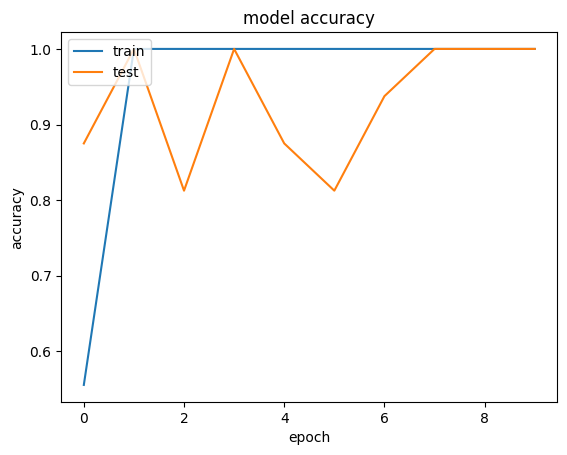

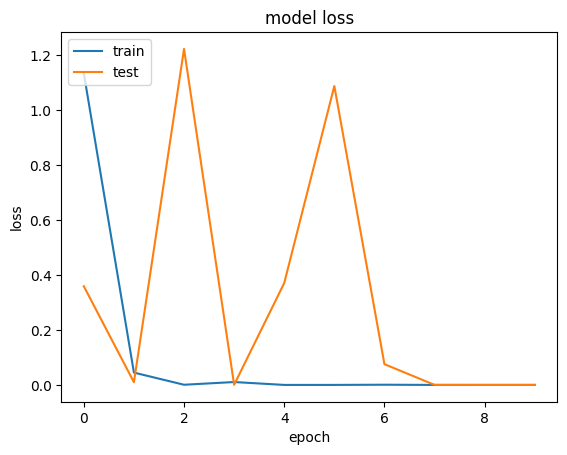

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
modelnnfinal.predict(XTest.values)

1/1 [==============================] - 0s 141ms/step


array([[2.3235905e-21, 1.0592860e-28, 1.2457435e-18, 9.9999994e-01],
       [5.7836079e-15, 4.9824428e-27, 2.3756997e-14, 9.9999994e-01],
       [1.4716976e-24, 5.7734176e-32, 5.7569751e-22, 9.9999994e-01],
       [9.9999303e-01, 6.0260498e-11, 6.9539019e-06, 2.7908964e-10],
       [2.6105868e-31, 9.9999994e-01, 4.7676971e-29, 1.0239196e-18],
       [9.9999994e-01, 2.9434910e-32, 2.8226399e-10, 1.3925085e-25],
       [3.1072517e-24, 9.9999994e-01, 4.0528099e-22, 1.4918844e-14],
       [2.5451621e-19, 9.0871976e-31, 9.9999994e-01, 1.9004439e-27],
       [3.7497702e-35, 9.9999994e-01, 3.4257558e-32, 6.1337906e-21],
       [1.5095178e-05, 1.1444003e-10, 9.9998480e-01, 1.0287525e-08],
       [2.7670754e-24, 9.9999994e-01, 2.7610152e-22, 7.3880863e-14],
       [1.1799668e-13, 1.9467647e-21, 9.9999994e-01, 5.3148199e-20],
       [2.3248785e-19, 9.9999994e-01, 5.6417829e-18, 2.7500934e-11],
       [9.9999994e-01, 3.1284755e-28, 4.3907868e-13, 3.3863491e-24],
       [9.9999994e-01, 1.6702059e-

In [ ]:
predictionsnnfinal =np.argmax( modelnnfinal.predict(XTest.values),axis=1)

1/1 [==============================] - 0s 49ms/step


In [ ]:
predictionsnnfinal

array([3, 3, 3, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 0, 3])

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1 = f1_score(YTest.values, predictionsnnfinal, average='macro')

print("F1 score:", f1)

F1 score: 1.0


In [ ]:
print(classification_report(YTest.values, predictionsnnfinal))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



Our Neural NETWORKS Models are  better like other models...

### MLP Classifier (ANN Model)

Multilayer perceptron (MLP) is a technique of feed-forward artificial neural networks using a back propagation learning method to classify the target variable used for supervised learning.

MLP’s can be applied to complex non-linear problems, and it also works well with large input data with a relatively faster performance. The algorithm tends to achieve the same accuracy ratio even with smaller data.

https://www.smarten.com/blog/multilayer-perceptron-classifier-enterprise-analysis/

In [ ]:
from sklearn.neural_network import MLPClassifier

# Create an instance of MLPClassifier
modelmlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam')

# Train the model on your training data
modelmlp.fit(XTrain,YTrain)

# Make predictions on new data
predictionsmlp = modelmlp.predict(XTest)

In [ ]:
predictionsmlp

array([3, 3, 3, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 0, 3])

In [ ]:
# Make predictions on the test set
predictions = modelmlp.predict(XTest)

# Compute the F1 score
f1 = f1_score(YTest, predictions, average='macro')

print("F1 score:", f1)


F1 score: 0.9272727272727272


In [ ]:
predictionsmlp

array([3, 3, 3, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 0, 3])

In [ ]:
conf_matrix = confusion_matrix(YTest_Data, predictionsmlp)
classreport_mlp=classification_report(YTest_Data, predictionsmlp)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.83      1.00      0.91         5
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.96      0.92      0.93        16
weighted avg       0.95      0.94      0.93        16



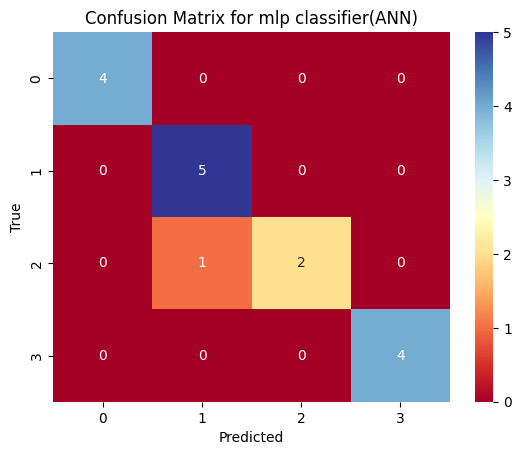

In [ ]:
sns.heatmap(conf_matrix, cmap='RdYlBu', annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for mlp classifier(ANN)')
print(classreport_mlp)
plt.show()

### FASTTEXT MODEL

let us try with fasttext model

What is FastText?

FastText is an open-source, free library from Facebook AI Research(FAIR) for learning word embeddings and word classifications. This model allows creating unsupervised learning or supervised learning algorithm for obtaining vector representations for words. It also evaluates these models. FastText supports both CBOW and Skip-gram models.

Uses of FastText:

It is used for finding semantic similarities
It can also be used for text classification(ex: spam filtering).
It can train large datasets in minutes.

https://fasttext.cc/docs/en/python-module.html

https://www.geeksforgeeks.org/fasttext-working-and-implementation/

In [ ]:
pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.4-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4393403 sha256=8ac8a97360fceafb09cdcee72f06f95fad6fdcde94f777c07d514d45d2e794a3
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
pip install --upgrade fasttext

In [ ]:
import fasttext

In [ ]:
# Prepare the training data in FastText format
train_data = [f'__label__{label} {text}' for text, label in zip(XTrain_Data, YTrain_Data)]
train_file = 'train.txt'

# Save the training data to a file
with open(train_file, 'w', encoding='utf-8') as f:
    for line in train_data:
        f.write(line + '\n')

# Train the FastText model
model = fasttext.train_supervised(input=train_file)

# Evaluate the model
result = model.test(train_file)
precision = result[1]
recall = result[2]
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Save the trained model
model.save_model("fasttext_model.bin")

# Load the saved model
loaded_model = fasttext.load_model("fasttext_model.bin")


Precision: 0.8412698412698413
Recall: 0.8412698412698413
F1-Score: 0.8412698412698413


In [ ]:
YTest_pred = [model.predict(text)[0][0].replace('__label__', '') for text in XTest_Data]

# Convert predicted labels to numeric values
YTest_pred = np.array(YTest_pred, dtype=int)

# Compute confusion matrix
confusion_mat = confusion_matrix(YTest_Data, YTest_pred)

print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[3 1 0 0]
 [0 5 0 0]
 [1 0 1 1]
 [0 0 0 4]]


In [ ]:
YTest_pred

array([3, 3, 3, 1, 1, 0, 1, 3, 1, 0, 1, 2, 1, 0, 0, 3])

In [ ]:
YTest

72    3
69    3
64    3
44    0
11    1
48    0
20    1
27    2
1     1
32    2
0     1
35    2
22    1
45    0
52    0
65    3
Name: JobPost, dtype: int64

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       1.00      0.83      0.91         6
           2       0.33      1.00      0.50         1
           3       1.00      0.80      0.89         5

    accuracy                           0.81        16
   macro avg       0.77      0.85      0.76        16
weighted avg       0.90      0.81      0.84        16



Text(50.722222222222214, 0.5, 'Actual')

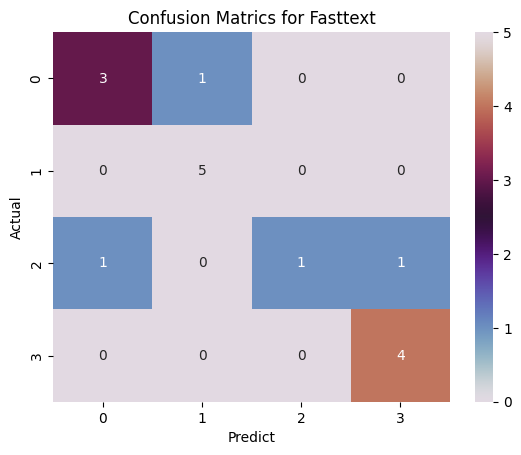

In [ ]:
print(classification_report(YTest_pred ,YTest))

sns.heatmap(confusion_mat,annot=True,cmap='twilight')
plt.title("Confusion Matrics for Fasttext")
plt.xlabel("Predict")
plt.ylabel("Actual")

Let us go for lazy predict to see what model will be best to automate the classifiers....but its an AI tool library to simply suggest us with accuracy and model f1 scores so with proper hyper parameter tuning we can get good models.Just we will go for lazy too to avoid

### Lazy predict for model evaluation predict

In [ ]:
pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
Lazyclf=LazyClassifier(predictions=True)
lazymodels,predictions=Lazyclf.fit(XTrain,XTest,YTrain,YTest)

100%|██████████| 29/29 [00:07<00:00,  3.97it/s]


In [ ]:
lazymodels

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.94,0.92,None,0.93,0.16
BaggingClassifier,0.94,0.92,None,0.93,0.17
SGDClassifier,0.94,0.92,None,0.93,0.21
CalibratedClassifierCV,0.94,0.92,None,0.93,0.32
DecisionTreeClassifier,0.94,0.92,None,0.93,0.11
RidgeClassifierCV,0.94,0.92,None,0.93,0.28
RidgeClassifier,0.94,0.92,None,0.93,0.15
Perceptron,0.94,0.92,None,0.93,0.12
PassiveAggressiveClassifier,0.94,0.92,None,0.93,0.18


### conclusion

So finally after analysing each model f1 score ,recall and confusion matrix we finalised LR,SVM RF etc. so finally we are going with SVM to deploy.

### Pickle file creation for deployment (streamlit)

WE FINALISE SVM AS OUR FINAL MODEL AND MAKE PICKLE FILE FOR THAT

In [1]:
import pickle

In [2]:
file_path = "model.pkl"

In [3]:
1with open(file_path, "wb") as f:
    pickle.dump(best_model_svm, f)

1

In [5]:
print("Model saved as a pickle file.")

Model saved as a pickle file.


##Thank you